### Knowledge Search and Discovery

In [25]:
import requests
import pandas as pd
from base64 import b64decode
from IPython.display import Image, display
from pprint import PrettyPrinter
ppr=PrettyPrinter(width=150)

XDD_API_BASE_URL="https://xdd.wisc.edu/api/articles?dataset=xdd-covid-19&match=true&max=10"
XDD_ASKEM_BASE_URL="https://xdddev.chtc.io/askem/object?"
pd.set_option('display.max_colwidth', None)
def get_doi(xddid):
    resp = requests.get(f"{XDD_API_BASE_URL}&docid={xddid}&fields=doi&corpus=default")
    return resp.json()['success']['data']['data'][0]['doi']

def get_docs(url, abstract_length=400):
    resp = requests.get(url)
    rdata = resp.json()['success']['data']
    data = []
    for d in rdata:
        xddid = d["_gddid"]
        doi = list(filter(lambda i: i["type"]=="doi", d["identifier"]))[0]['id']
        link = list(filter(lambda i: i['type']=="publisher", d["link"]))[0]["url"]
        if abstract_length != -1:
            data.append((xddid, doi, d['title'], d['abstract'][:abstract_length]+"...", link))
        else:
            data.append((xddid, doi, d['title'], d['abstract'], link))
    return rdata, pd.DataFrame(data, columns=["xddid", "DOI", "Title", "Abstract", "Link"])


# Getting figures from a specific document
Figures (or tables) can be retrieved for a specific document by specifying a comma-separated list of docids to the COSMOS API endpoint:


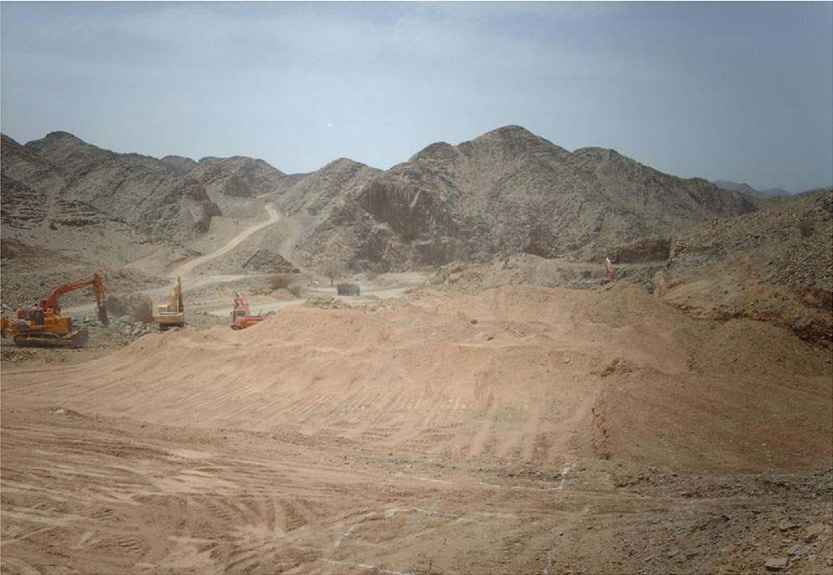

    ﺔﻴﺭﺨﺼﻟﺍ ﺕﺎﻔﻠﺨﻤﻟﺍ ﺔﻘﻁﻨﻤ )٧ ( ﻡﻗﺭ ﺓﺭﻭﺼ   
Figure


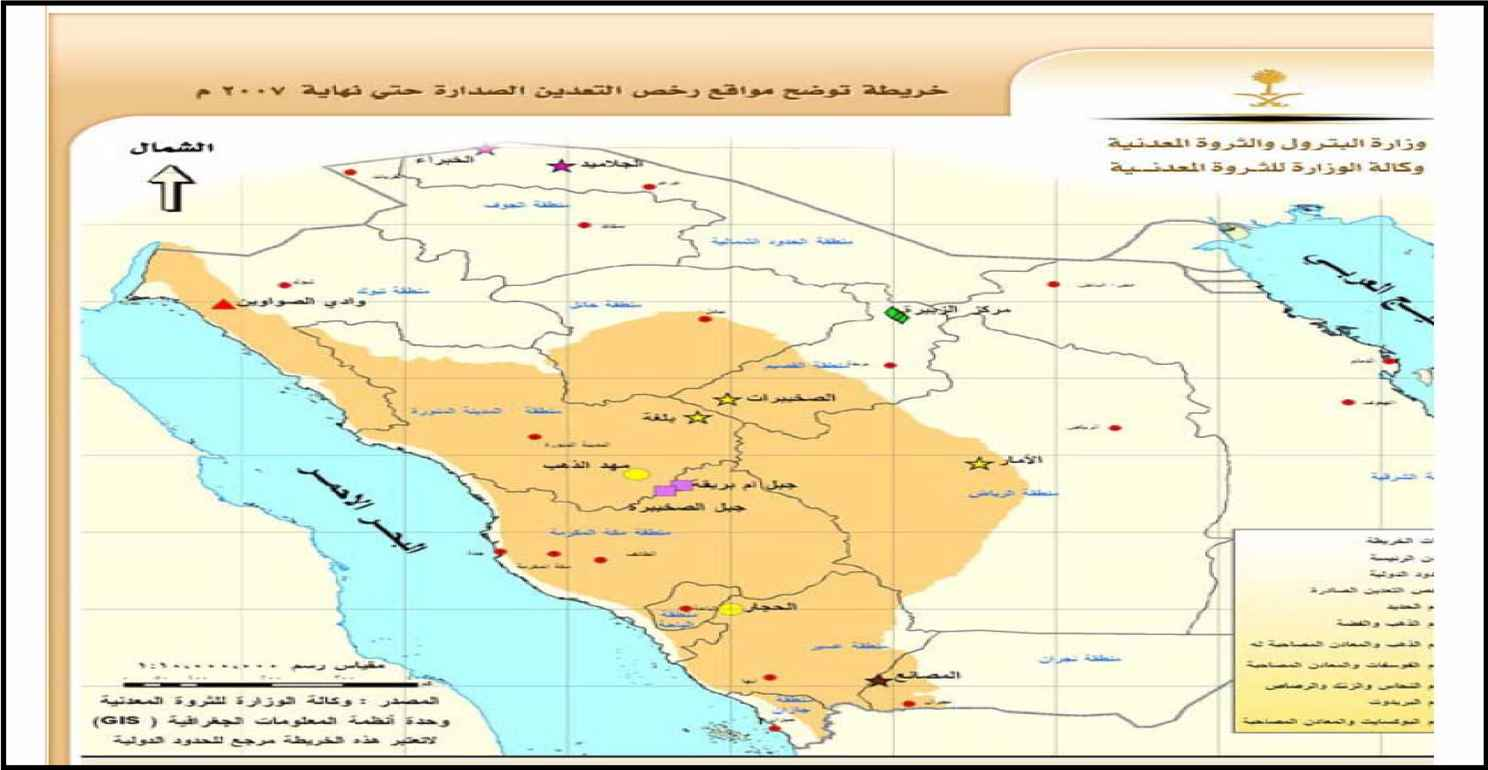


Figure


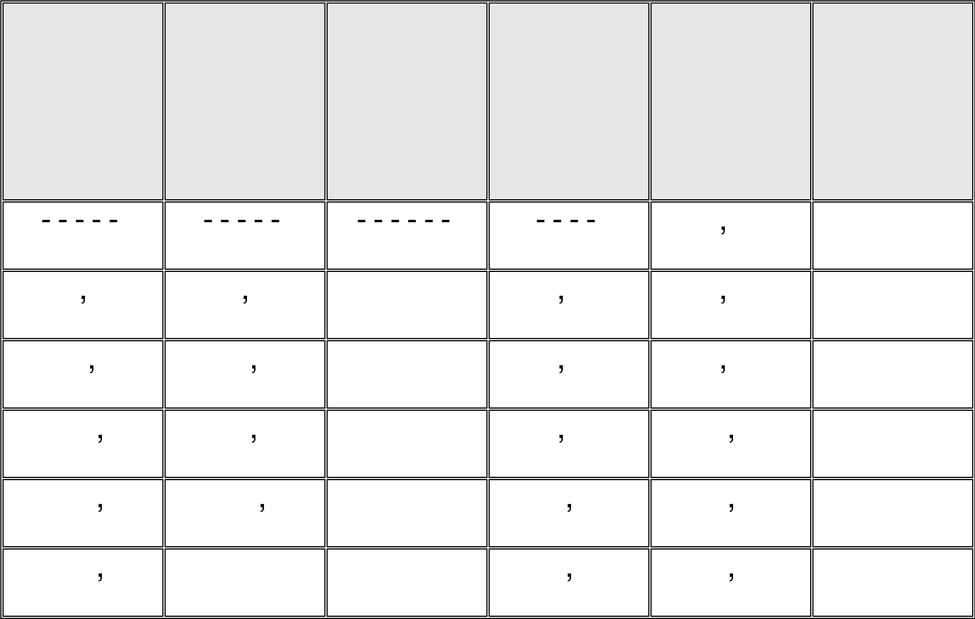

 ٤٢,٩  ٣٨,٥ ١٠  ٣,٨٥  ٦,٦٤  ١٧٤٠ ١٤١,٣  ٩٨,٤ ١٠  ٩,٨٤  ١٣,٠٤  ١٧٥٠ ٣١٢,٣  ١٧١,١ ١٠  ١٧,١١  ٢١,١٦  ١٧٦٠ ٥٦٠,٣  ٢٥٠ ١٠  ٢٥,٠٠  ٢٨,٨٥  ١٧٧٠   ﺔﻴﺭﺨﺼﻟﺍ ﺕﺎﻔﻠﺨﻤﻟﺍ ﺔﻘﻁﻨﻤﻟ ﺔﻴﻨﻴﺯﺨﺘﻟﺍ ﺔﻌﺴﻟﺍ ﺕﺎﺒﺎﺴﺤ ﻡﻗﺭ)٢ ( لﻭﺩﺠ ﺓﺀﺎﻔﻜ ﻥﻭﻜﺘﺴ ﻙﻟﺫﻟ ١,٠ ﻥﻭﻜﻴﺴ ﺔﻓﺎﺠﻟﺍ ﺕﺎﻤﺎﻋﺩﻠﻟ ﻕﻴﺒﻁﺘﻟﺍ لﻤﻌﻤ ﻥﺎﻓ ﺎﻫﺅﺍﺭﺠﺍ ﻡﺘ ﻰﺘﻟﺍ ﺔﻴﺒﺎﺴﺤ ﻟﺍ ﺕﺎﻴﻠﻤﻌﻠﻟ ﺎﻘﺒﻁ
Figure


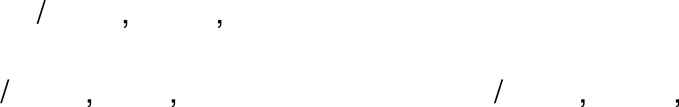

ﺔﻴﻨﻴﺩﻌﺘﻟﺍ ﺕﺎﻔﻠﺨﻤﻠﻟ ﺔﺒﻠﺼﻟﺍ ﺕﺎﻨﻭﻜﻤﻟﺍ ﺢﻁﺴﺃ ﻰﻠﻋ ﺹﺘﻤﺘ ﻑﻭﺴ ﺎﻬﻨﺃ ﺙﻴﺤ ﺎﻬﻨﻤ ﺓﺭﻴﺒﻜ ﺔﺒﺴﻨ
Figure


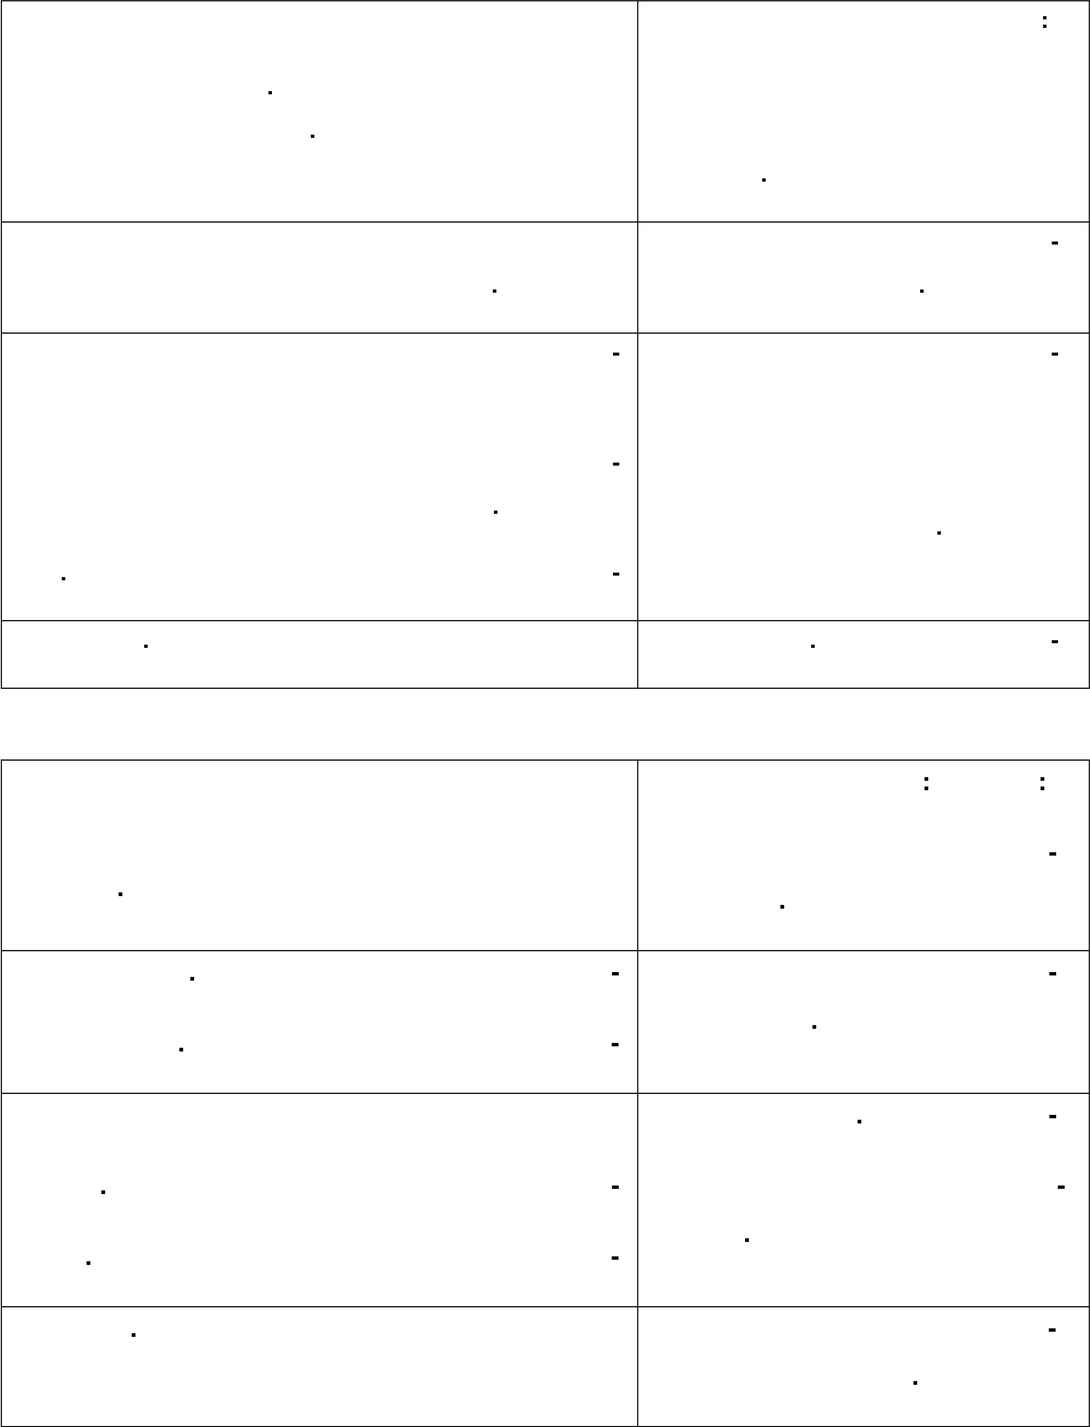

ﻥـﻤ ﺔـﺠﺘﺎﻨﻟﺍ ﻲﺤﺼـﻟﺍ ﻑﺭﺼـﻟﺍ ﻩﺎـﻴﻤﻭ ﺭﻔﺤﻟﺍ ﺕﺍﺩﻌﻤ لـﺒﻗ ﺱﻴﻴﺎـﻘﻤﻟﺍﻭ ﺕﺎﻔـﺼﺍﻭﻤﻠﻟ لﻭﻴﺴﻟﺍ ﻱﺭﺎﺠﻤﻭ ﻲﺤﺼﻟﺍ ﻑﺭﺼﻟﺍ ﻩﺎﻴﻤ ﺔﻘﺒﺎﻁﻤ - ﻥﻴﺫـﻟﺍ ﺩﺍﺭـﻓﻷﺍ لـﺒﻗ ﻥـﻤ ﻩﺎﻴﻤﻠﻟ ﺔﻴﺼﺨﺸﻟﺍ ﺕﺎﻤﺍﺩﺨﺘﺴﻹﺍ . ﻰﺌﺎﻬﻨﻟﺍ ﻑﻴﺭﺼﺘﻟﺍ . ﻊﻗﻭﻤﻟﺍ ﻲﻓ ﻥﻭﻠﻤﻌﻴ . ﻑﻴﻅﻨﺘﻟﺍ لﻴﻟﺎﺤﻤﻭ ﻡﻴﺤﺸﺘﻟﺍ ﺩﺭﺍﻭﻤ ﻭﺃ ﺕﻭﻴﺯﻠﻟ ﺏﺎﻜﺴﻨﺍ ﻱﻷ ﻱﺭﻭﻔﻟﺍ ﻑﻴﻅﻨﺘﻟﺍ - . ﺓﺩﻭﻘﻔﻤﻟﺍ ﻩﺎﻴﻤﻟﺍ ﺽﻴﻭﻌﺘﻟ ﻯﺭﺨﺃ ﺭﺩﺎﺼﻤ ﻥﻤ ﺔﻴﻓﺎﻀﺍ ﺕﺍﺩﺍﺩﻤﺍ  ﺭﻴﻓﻭﺘ . ﻪﻴﻠﺤﻤﻟﺍ ﻩﺎﻴﻤﻟﺍ ﻥﻭﺯﺨﻤ ﺽﺎﻔﺨﻨﺍ ٥-   : ﺔﻴﺭﺒﻟﺍ ﺓﺎﻴﺤ :ﻟﺍ ﹰﺎﺜﻟﺎﺜ ﻰﻟﺇ ﻊﻗﻭﻤﻟﺍ ﺓﺩﺎ ﺇﻭﻋ ﺕﺩﺠﻭ ﻥﺍ ﺔﻴﻌﻴﺒﻁﻟﺍ ﺕﺎﺌﻴﺒﻟﺍﻭ ﻲﻀﺍﺭﻷﺍ ﻰﻠﻋ ﺔﻅﻓﺎﺤﻤﻟﺍ ﺔﻴﺭﺒﻟﺍ ﺀﺎﻴﺤﻷﺍ ﺩﺍﺩﻋﺃﻭ ﺭﺜﺎﻜﺘ ﺕﻻﺩﻌﻤ ﺽﺎﻔﺨﻨﺍ ١- . ﻡﺎﺨﻟﺍ ﺩﺍﻭﻤﻟﺍ ﺝﺍﺭﺨﺘﺴﺍ ﺕﺎﻴﻠﻤﻋ ﻥﻤ ﺀﺎﻬﺘﻨﻻﺍ ﺩﻌﺒ ﻰﻌﻴﺒﻁ ﻟﺍ ﻪﻌﻀﻭ . ﺎﻬﻴﻓ ﺵﻴﻌﻨ ﻲﺘﻟﺍ ﻥﻜﺎﻤﻷﺍ ﺭﻴﻴﻐﺘ ﺔﺠﻴﺘﻨ . ﺔﻴﺭﺒﻟﺍ ﺀﺎﻴﺤﻷﺍ ﺭﻭﺒﻋ ﻥﻜﺎﻤﺃ ﻰﻠﻋ لﺩﺘ ﺕﺎﻤﻼﻋ ﻊﻀﻭ - ﺔﻜﺭﺤ ﺔﺠﻴﺘﻨ ﺔﻴﺭﺒﻟﺍ ﺔﻴﺤﻟﺍ ﺕﺎﻨﺌﺎﻜﻟﺍ ﺽﻌﺒ ﺀﺎﻔﺘﺨﺍ ٢- . ﺽﺭﻷﺍ ﺢﻁﺴ ﺏﺍﺭﻁﻀﺍﻭ ﺭﻭﺭﻤﻟﺍ . ﺔﻴﺭﺒﻟﺍ ﺕﺎﻨﺌﺎﻜﻟﺍ ﻥﻤ ﻱﺃ ﺱﻫﺩ ﻲﻓﻼﺘﻟ ﻥﻴﻘﺌﺎﺴﻟﺍ ﺔﻴﻋﻭﺘ - . ﺔﺒﺭﺘﻟﺍﻭ ﻲﺘﺎﺒﻨﻟﺍ ﺀﺎﻁﻐﻟﺍ ٣-  ﺔﺒﺭﺘﻟﺍ ﺔﻴﺠﺎﺘﻨﺇﻭ ﻲﺘﺎﺒﻨﻟﺍ ﺀﺎﻁﻐﻟﺍ ﻥﺍﺩﻘﻓ ﻭﺃ ﺭﻭﻫﺩﺘ ﺃ- . ﺭﺠﺎﺤﻤﻟﺍ ﻥﻤ ﺔﺠﺭﺨﺘﺴﻤﻟﺍ ﻩﺎﻴﻤﻟﺍﻭ ﻲﺤﺼﻟﺍ ﻑﺭﺼﻟﺍ ﻩﺎﻴﻤ ﺔﺠﻟﺎﻌﻤ - . ﺔﺜﻭﻠﻤﻟﺍ ﻩﺎﻴﻤﻟﺍ ﻑﻴﺭﺼﺘ ﻭ ﻑﻴﺭﺠﺘﻠﻟ ﺔﺠﻴﺘﻨ . ﻑﻴﻅﻨﺘﻟﺍﻭ ﻡﻴﺤﺸﺘﻟﺍ ﺩﺍﻭﻤ ﻭﺃ ﺕﻭﻴﺯﻠﻟ ﺏﺭﺴﺘ ﻱﻷ ﻱﺭﻭﻔﻟﺍ ﻑﻴﻅﻨﺘﻟﺍ - . ﺓ

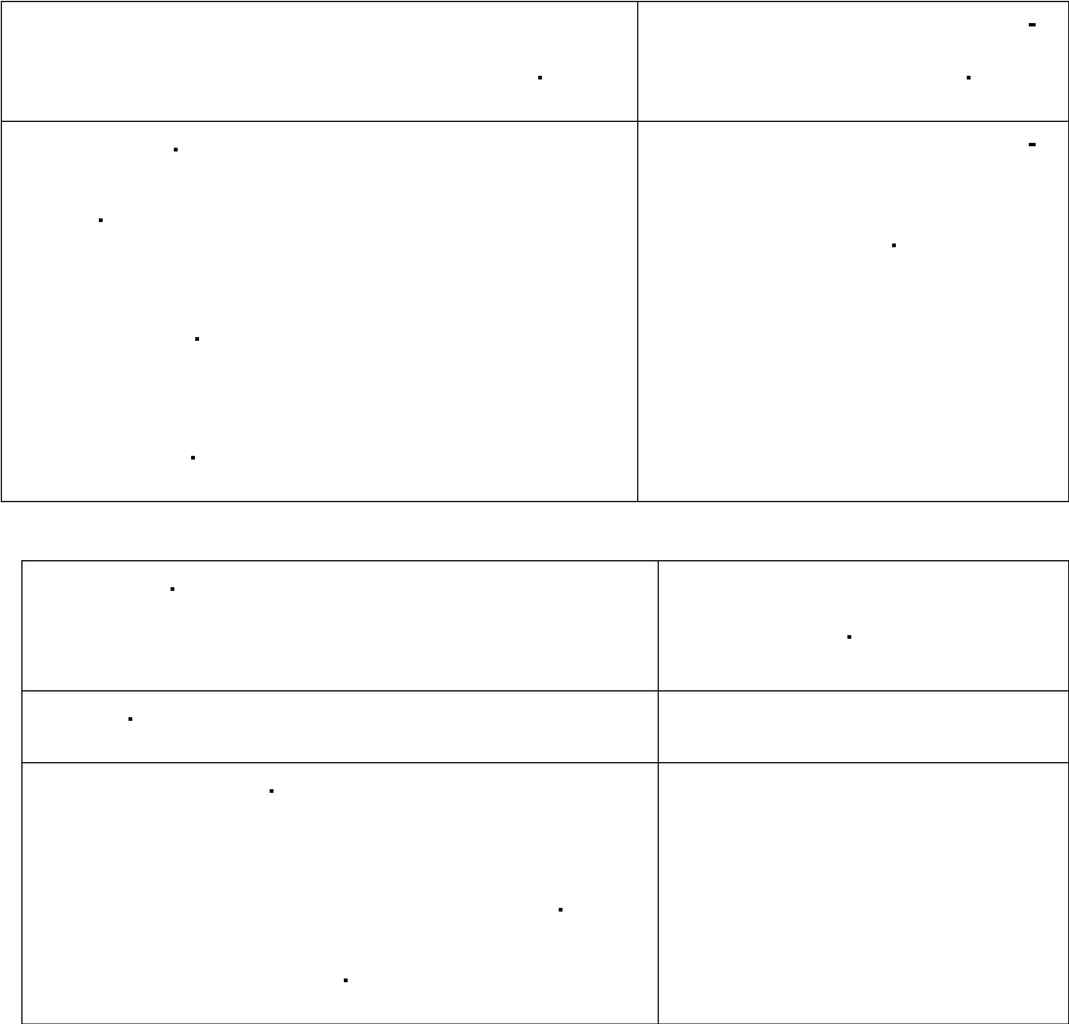

ﺕﻼﻓﺎﺤ ﻲﻓ ﻉﻭﺭﺸﻤﻟﺍ . ﻊﻗﻭﻤﻟﺍ ﻲﻓ ﺕﺎﺒﻜﺭﻤﻟﺍ ﺩﺩﻋ لﻴﻠﻘﺘﻟ . ﺎﻬﺒ ﻁﻴﺤﻤﻟﺍ ﺔﻴﻔﻠﺨﻟﺍ ﻊﻤ ﺔﻘﺴﺎﻨﺘﻤ ﺎﻬﻠﻌﺠﻴ ﺎﻤﻤ ﺕ ﺂﺸﻨﻤﻟﺍ ﺀﻼﻁ ﺕﺎـﻴﺭﻔﺤﻭ ﺭﻔﺤﻟﺍ ﺕﺎﻴﻟﺁ ﺏﺒﺴﺒ ﺔﻴﺌﺭﻤﻟﺍ  ﺕﺍﺭﻴﺜﺎﺘﻟﺍ . ﺔﻠﻴﻘﺜﻟﺍ ﺕﺍﺩﻌﻤﻟﺍﻭ  ﺭﺠﺎﺤﻤﻟﺍ   . ﺭﺎﺠﺸﻷﺍ ﻊﻁﻗ لﻴﻠﻘﺘﻭ ﻡﺎﺨﻟﺍ ﺩﺍﻭﻤﻟﺍ ﻕﻓﺍﺭﻤﻟ ﺭﻭﺒﻋ ﺕﺍﺭﻤﻤ ﻡﺍﺩﺨﺘﺴﺇ ﻊﻗﻭﻤﻟﺍ ﻲﻓ ﺓﺩﻭﺠﻭﻤﻟﺍ ﺭﺎﺠﺸﻷﺍ  ﻊﻁﻗ  ﺙﺩﺍﻭﺤﻟﺍ ﺕﺎﻴﻓﻭ ﻭﺃ ﺕﺎﺒﺎﺼﺇ . ﺔﻤﻼﺴﻟﺍ ﺕﺍﺀﺍﺭﺠﺇ ﻰﻠﻋ لﺎﻤﻌﻠﻟ ﻱﺭﻭﺩﻟﺍ ﺏﻴﺭﺩﺘﻟﺍ ﺔﻤﻼﺴـﻟﺍ ﺕﺍﺀﺍﺭـﺠﺇ ﺫﺎﺨﺘﺇ ﺓﺭﻭﺭﻀﻭ ﺔﻠﻤﺘﺤﻤﻟﺍ ﺭﺎﻁﺨﻷﺍ ﻰﻠﻋ ﻥﻴﺭﺌﺍﺯﻟﺍ ﻉﻼﻁﺇ . ﺔﻴﺭﻭﺭﻀﻟﺍ . ﺭﺍﻭﺯﻟﺍﻭ لﺎﻤﻌﻠﻟ ﺔﻤﻼﺴﻟﺍ ﺕﺍﺩﻌﻤ ﺭﻴﻓﻭﺘ  
Figure


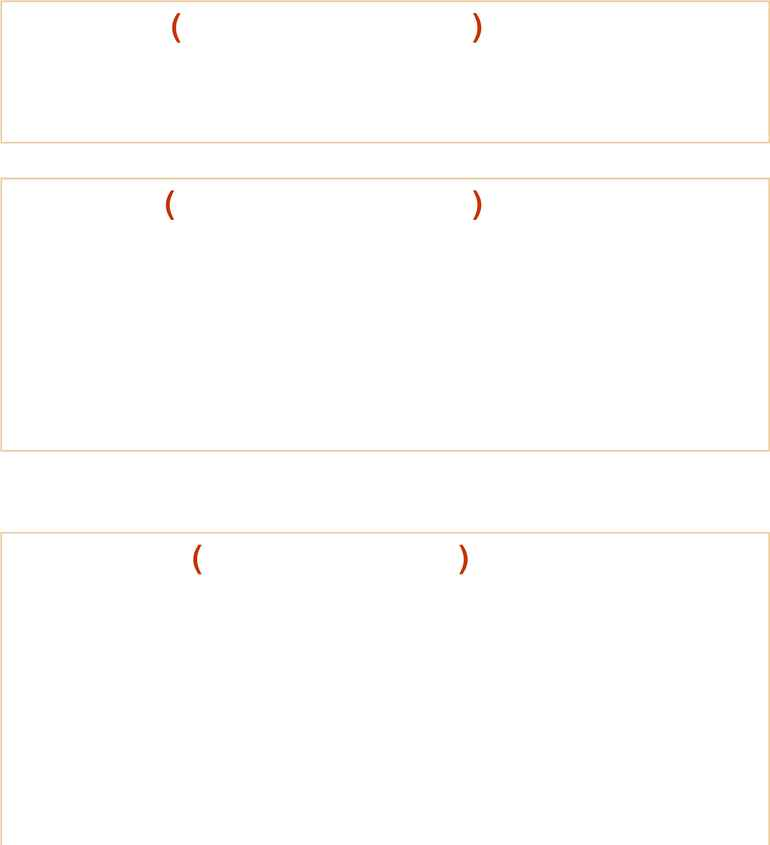

 ﻡﻮﺳﺮﻟﺍ  ﻥﻮﻌﺑﺭﻷﺍﻭ ﺔﻌﺳﺎﺘﻟﺍ ﺓﺩﺎﳌﺍ   ﻝﻼﻐﺘﺳﻼﻟ ﱄﺎﳌﺍ ﻞﺑﺎﻘﳌﺍﻭ ﻲﺤﻄﺴﻟﺍ ﺭﺎﳚﻹﺍ ﻥﻮﺴﻤﳋﺍ ﺓﺩﺎﳌﺍ   ﻥﺪﻌﳌﺍ ﺔﻤﻴﻗ ﺪﻳﺪﲢ ﺎ ﻢﺘﻳ ﱵﻟﺍ ﺔﻴﻔﻴﻜﻟﺍ  ﻥﻮﺴﻤﳋﺍﻭ ﺔﻳﺩﺎﳊﺍ ﺓﺩﺎﳌﺍ  ﺭﺎﻤﺜﺘﺳﻻﺍ ﺰﻓﺍﻮﺣ ﻥﻮﺴﻤﳋﺍﻭ ﺔﻴﻧﺎﺜﻟﺍ ﺓﺩﺎﳌﺍ   ﺔﻴﻛﺮﻤﳉﺍ ﻡﻮﺳﺮﻟﺍ ﻦﻣ ﺀﺎﻔﻋﻹﺍ  ﻥﻮﺴﻤﳋﺍﻭ ﺔﺜﻟﺎﺜﻟﺍ ﺓﺩﺎﳌﺍ ﺔﺤﻔﺼﻟﺍ ﻲﻠﻋﺃ ( ﺔـــــﻋﻮﻨﺘﻣ ﻡﺎﻜــﺣﺃ ) ﻊﺑﺎﺴﻟﺍ ﺏﺎﺒﻟﺍ  ﺔﻣﺎﻋ ﺕﺎﺑﻮﻘﻋ  ﻥﻮﺴﻤﳋﺍﻭ ﺔﻌﺑﺍﺮﻟﺍ ﺓﺩﺎﳌﺍ  ﺔﺤﻴﺤﺻ ﲑﻏ ﺕﺎﻣﻮﻠﻌﻣ ﱘﺪﻘﺗ ﺔﺑﻮﻘﻋ ﻥﻮﺴﻤﳋﺍﻭ ﺔﺴﻣﺎﳋﺍ ﺓﺩﺎﳌﺍ   ﺔﻟﻭﺪﻠﻟ ﺔﻘﺤﺘﺴﳌﺍ ﻎﻟﺎﺒﳌﺍ ﻊﻓﺩ ﻦﻋ ﺮﺧﺄﺘﻟﺍ ﺔﺑﻮﻘﻋ  ﻥﻮﺴﻤﳋﺍﻭ ﺔﺳﺩﺎﺴﻟﺍ ﺓﺩﺎﳌﺍ  ﺔﺤﻴﺤﺻ ﲑﻏ ﺕﺎﻣﻮﻠﻌﻣ ﱘﺪﻘﺗ ﺔﺑﻮﻘﻋ ﻥﻮﺴﻤﳋﺍﻭ ﺔﻌﺑﺎﺴﻟﺍ ﺓﺩﺎﳌﺍ   ﻢﻴﻜﺤﺘﻟﺍ  ﻥﻮﺴﻤﳋﺍﻭ ﺔﻨﻣﺎﺜﻟﺍ ﺓﺩﺎﳌﺍ ﻥﻮﺴﻤﳋﺍﻭ ﺔﻌﺳﺎﺘﻟﺍ ﺓﺩﺎﳌﺍ 
Figure


In [29]:
url = f"https://xdd.wisc.edu/sets/geoarchive/cosmos/api/search?docids=620d5253ad0e9c819b07956a&type=Figure"
resp = requests.get(url)
data = resp.json()
data
for obj in data["objects"]:
    result = obj['children'][0]
    display(Image(b64decode(result['bytes']),width=600))
    print(result['content'])
    print(result['cls'])

# Getting extractions that match a search term
Figures or tables that include a phrase can be retrieved by utilizing the `term` parameter on COSMOS API endpoint:

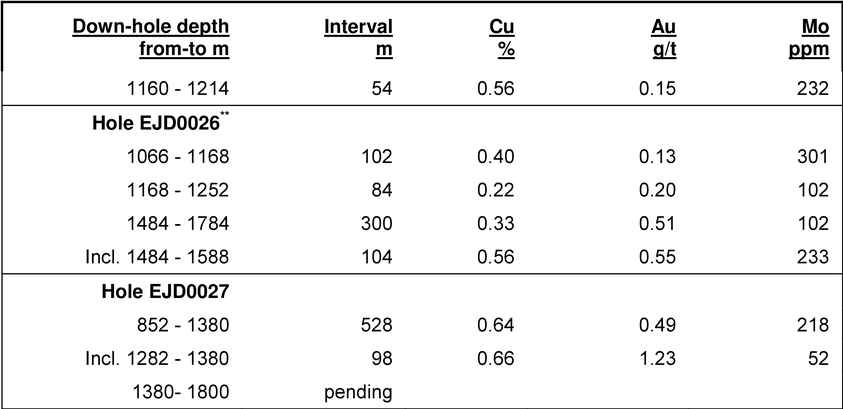

Down-hole depth Interval Cu Au Mo from-to m m % g/t ppm 1160 - 1214 54 0.56 0.15 232 Hole EJD0026**     1066 - 1168 102 0.40 0.13 301 1168 - 1252 84 0.22 0.20 102 1484 - 1784 300 0.33 0.51 102 Incl. 1484 - 1588 104 0.56 0.55 233 Hole EJD0027     852 - 1380 528 0.64 0.49 218 Incl. 1282 - 1380 98 0.66 1.23 52 1380- 1800 pending    
Figure


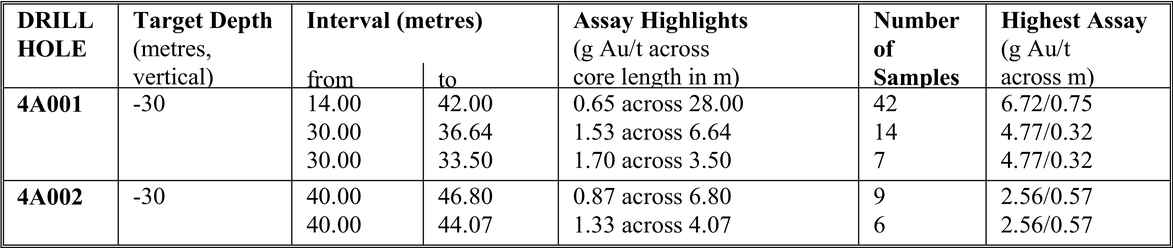

DRILL Target Depth Interval (metres) Assay Highlights Number Highest Assay (metres, (g Au/t across (g Au/t HOLE of vertical) core length in m) across m) Samples from to -30 14.00 42.00 0.65 across 28.00 42 6.72/0.75 4A001 30.00 36.64 1.53 across 6.64 14 4.77/0.32 30.00 33.50 1.70 across 3.50 7 4.77/0.32 -30 40.00 46.80 0.87 across 6.80 9 2.56/0.57 4A002 40.00 44.07 1.33 across 4.07 6 2.56/0.57
Table


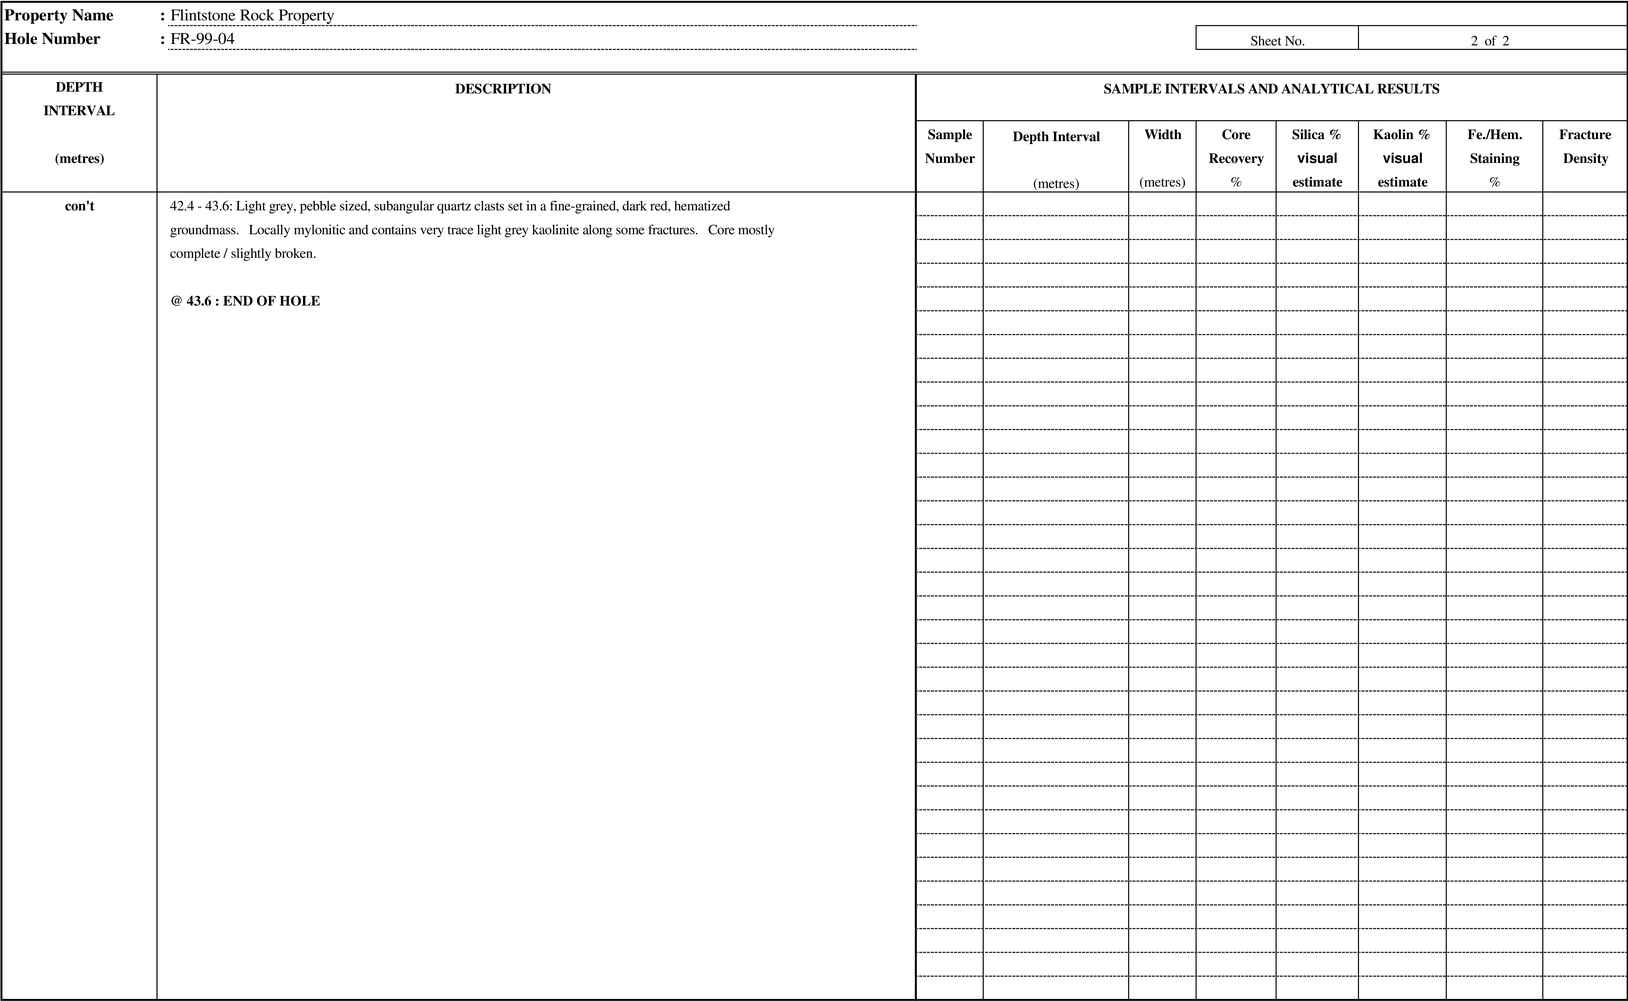

Property Name : Flintstone Rock Property Hole Number : FR-99-04 Sheet No. 2  of  2 DEPTH DESCRIPTION SAMPLE INTERVALS AND ANALYTICAL RESULTS INTERVAL Sample Width Core Silica % Kaolin % Fe./Hem. Fracture Depth Interval visual visual (metres) Number Recovery Staining Density (metres) % estimate estimate % (metres) con't 42.4 - 43.6: Light grey, pebble sized, subangular quartz clasts set in a fine-grained, dark red, hematized groundmass.   Locally mylonitic and contains very trace light grey kaolinite along some fractures.   Core mostly complete / slightly broken. @ 43.6 : END OF HOLE
Table


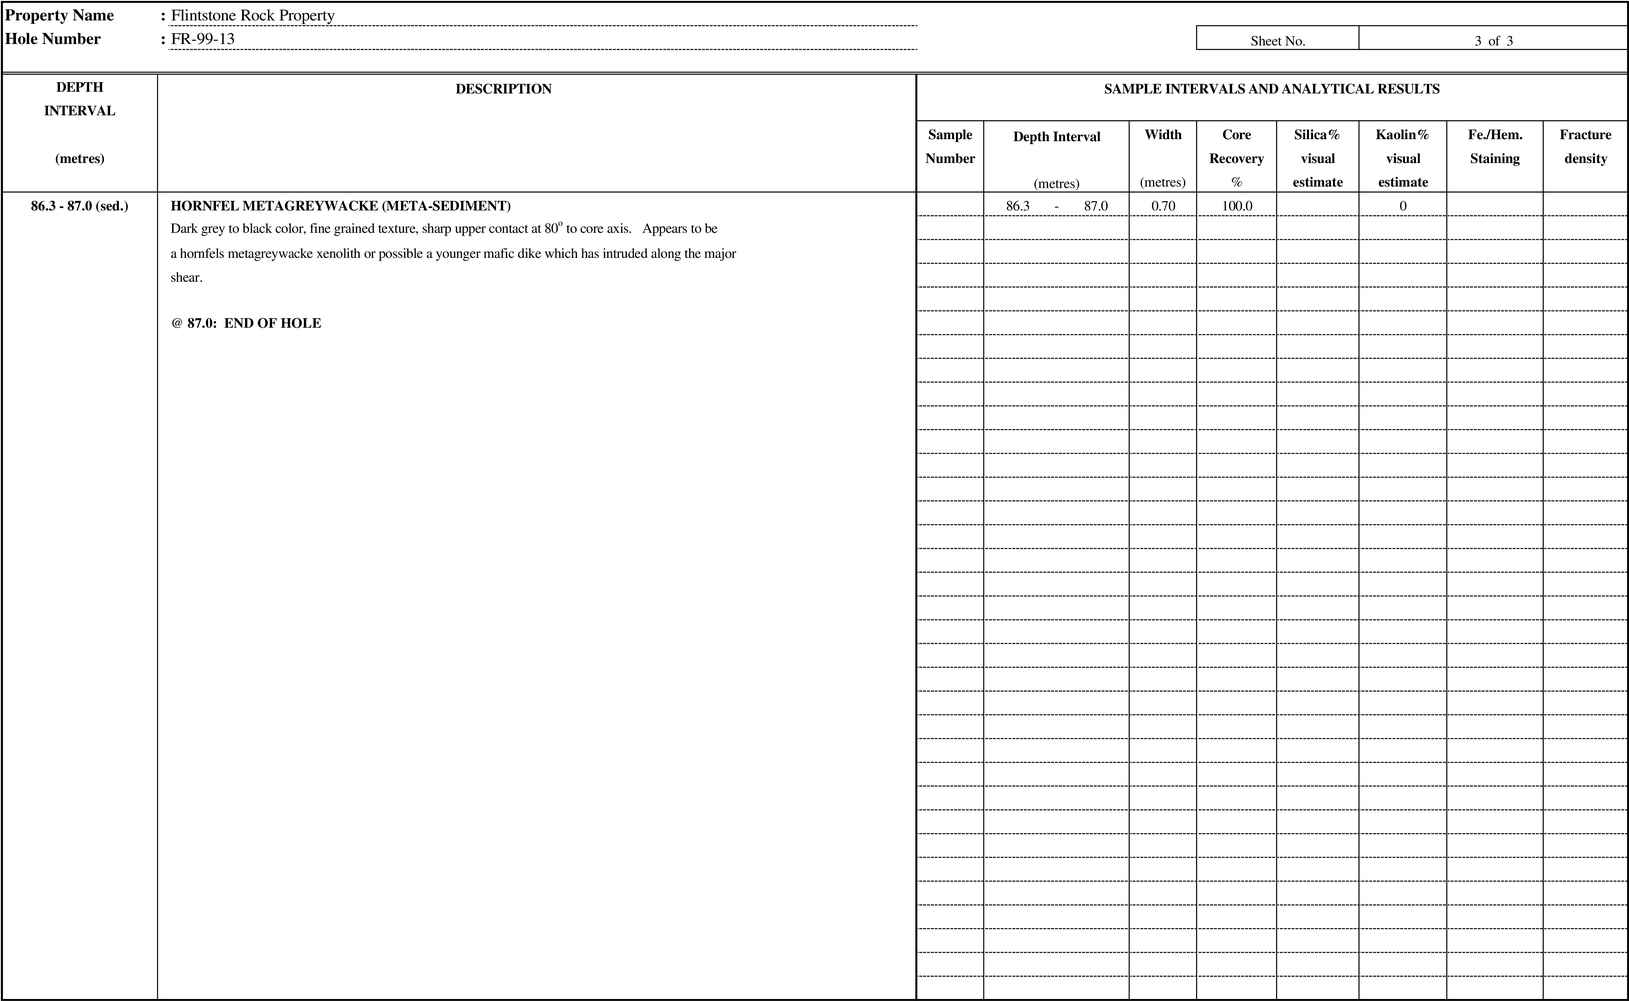

Property Name : Flintstone Rock Property Hole Number : FR-99-13 Sheet No. 3  of  3 DEPTH DESCRIPTION SAMPLE INTERVALS AND ANALYTICAL RESULTS INTERVAL Sample Width Core Silica% Kaolin% Fe./Hem. Fracture Depth Interval (metres) Number Recovery visual visual Staining density (metres) % estimate estimate (metres) 86.3 - 87.0 (sed.) HORNFEL METAGREYWACKE (META-SEDIMENT) 86.3 - 87.0 0.70 100.0 0 Dark grey to black color, fine grained texture, sharp upper contact at 80o to core axis.   Appears to be a hornfels metagreywacke xenolith or possible a younger mafic dike which has intruded along the major shear. @ 87.0:  END OF HOLE
Table


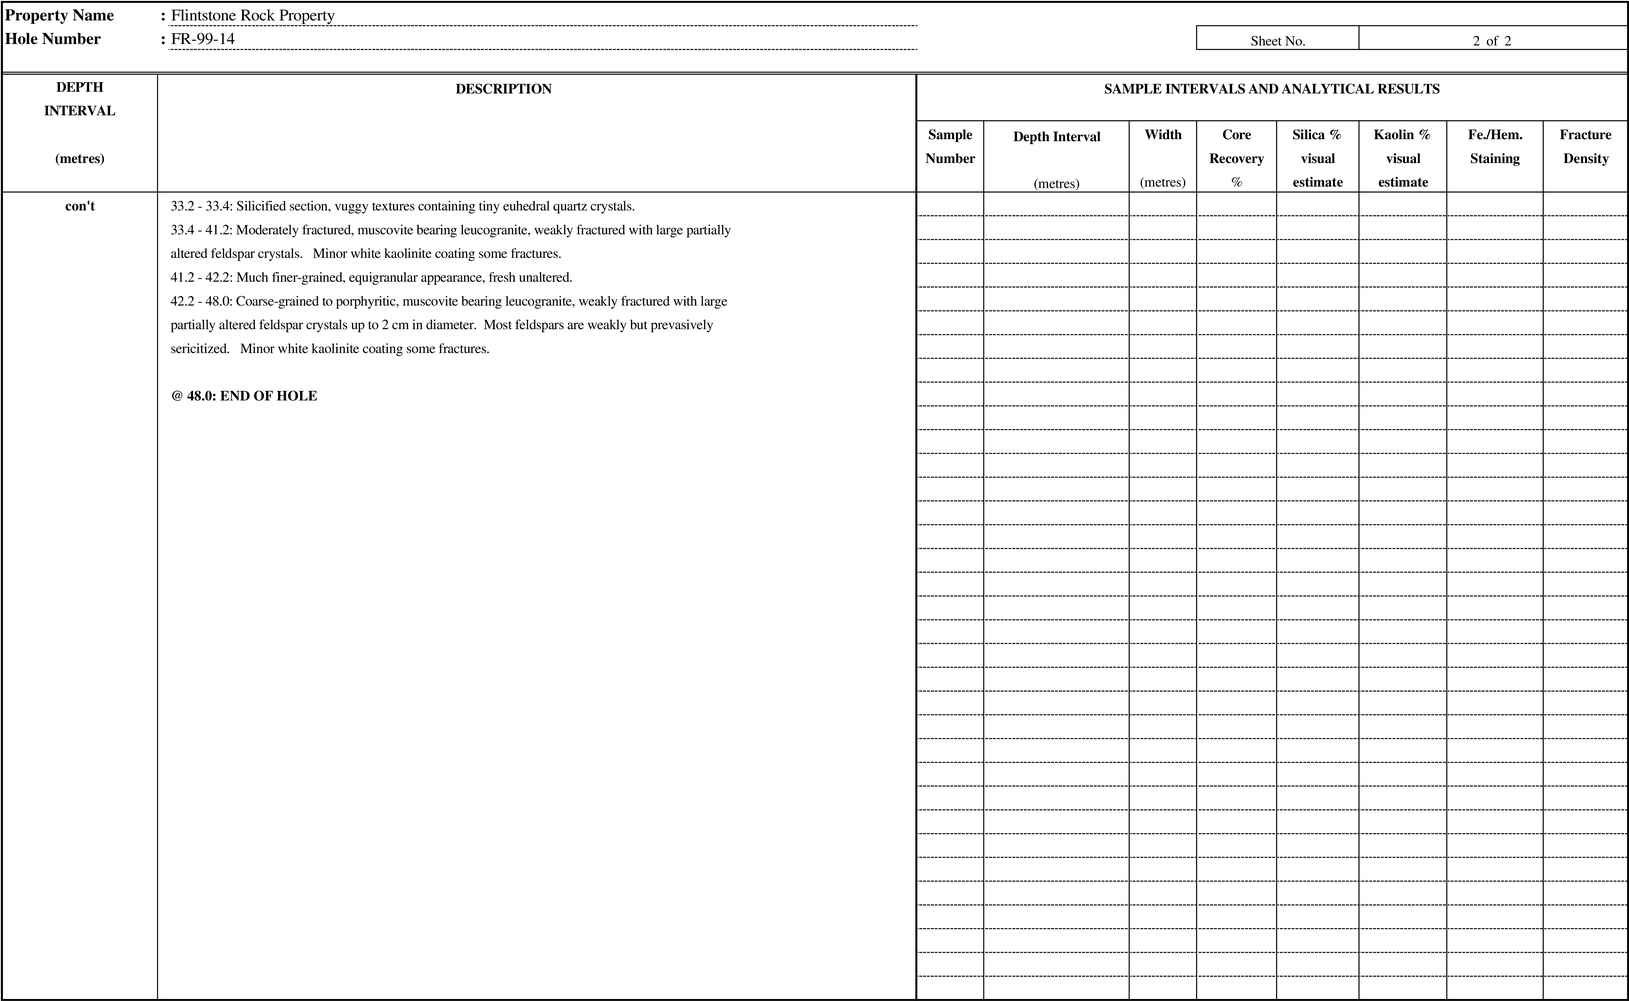

Property Name : Flintstone Rock Property Hole Number : FR-99-14 Sheet No. 2  of  2 DEPTH DESCRIPTION SAMPLE INTERVALS AND ANALYTICAL RESULTS INTERVAL Sample Width Core Silica % Kaolin % Fe./Hem. Fracture Depth Interval (metres) Number Recovery visual visual Staining Density (metres) % estimate estimate (metres) con't 33.2 - 33.4: Silicified section, vuggy textures containing tiny euhedral quartz crystals. 33.4 - 41.2: Moderately fractured, muscovite bearing leucogranite, weakly fractured with large partially altered feldspar crystals.   Minor white kaolinite coating some fractures. 41.2 - 42.2: Much finer-grained, equigranular appearance, fresh unaltered. 42.2 - 48.0: Coarse-grained to porphyritic, muscovite bearing leucogranite, weakly fractured with large partially altered feldspar crystals up to 2 cm in diameter.  Most feldspars are weakly but prevasively sericitized.   Minor white kaolinite coating some fractures. @ 48.0: END OF HOLE
Table


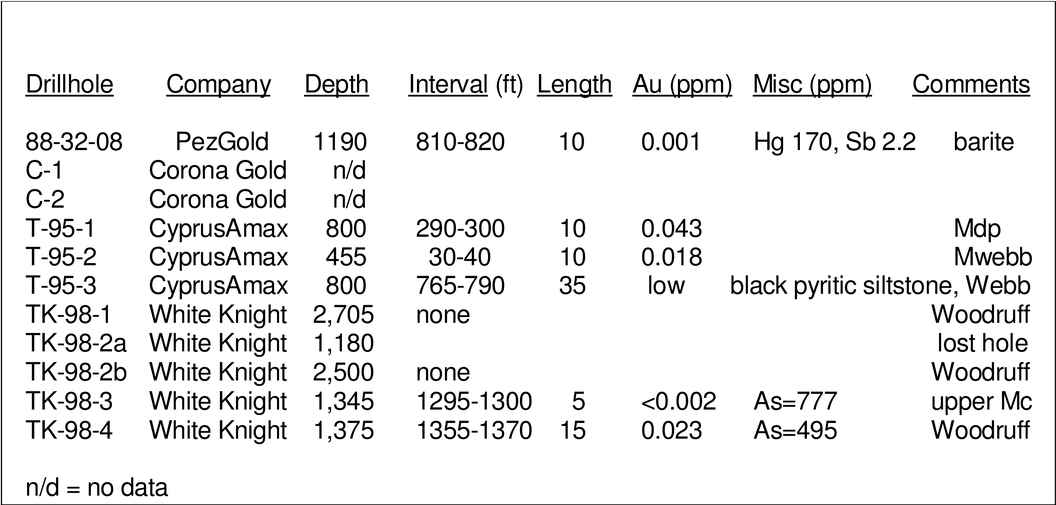

      Drillhole        Company     Depth      Interval (ft)  Length   Au (ppm)   Misc (ppm)      Comments            88-32-08 PezGold 1190 810-820        10 0.001 Hg 170, Sb 2.2      barite C-1 Corona Gold n/d  C-2 Corona Gold n/d  T-95-1 CyprusAmax 800 290-300 10 0.043  Mdp T-95-2 CyprusAmax     455 30-40 10 0.018  Mwebb T-95-3 CyprusAmax 800 765-790 35 low       black pyritic siltstone, Webb TK-98-1  White Knight  2,705 none    Woodruff TK-98-2a  White Knight  1,180     lost hole TK-98-2b  White Knight  2,500 none    Woodruff TK-98-3  White Knight  1,345 1295-1300 5 <0.002  As=777 upper Mc TK-98-4  White Knight  1,375 1355-1370  15 0.023 As=495 Woodruff      n/d = no data 
Table


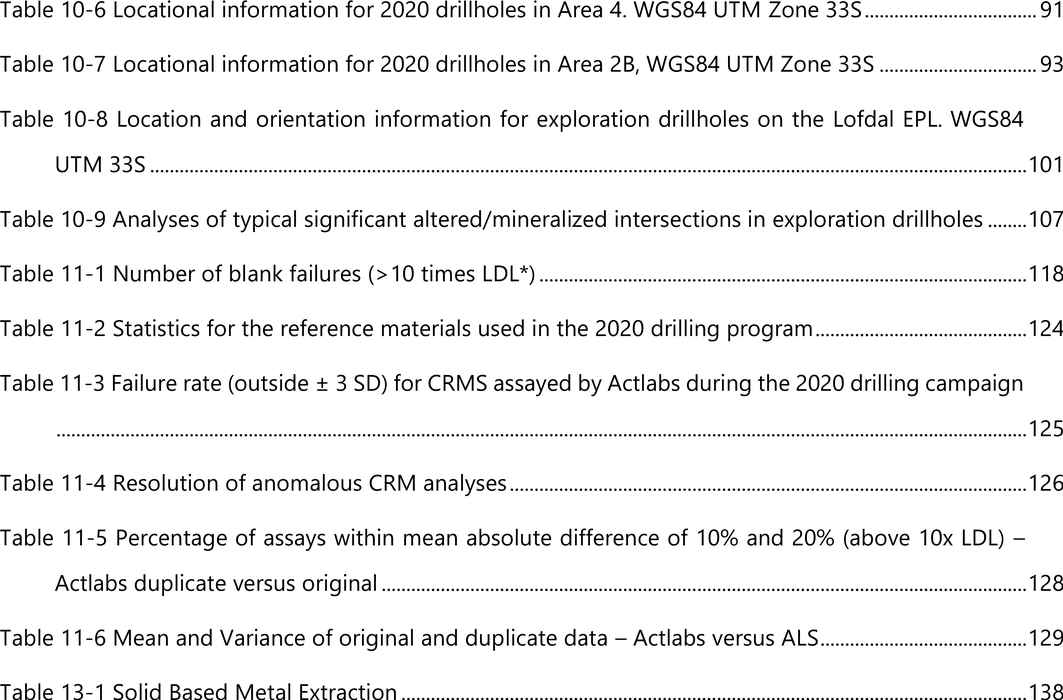

Table 10-6 Locational information for 2020 drillholes in Area 4. WGS84 UTM Zone 33S ................................... 91 Table 10-7 Locational information for 2020 drillholes in Area 2B, WGS84 UTM Zone 33S ................................ 93 Table 10-8 Location and orientation information for exploration drillholes on the Lofdal EPL. WGS84 UTM 33S .................................................................................................................................................................................. 101 Table 10-9 Analyses of typical significant altered/mineralized intersections in exploration drillholes ........ 107 Table 11-1 Number of blank failures (>10 times LDL*) ................................................................................................... 118 Table 11-2 Statistics for the reference materials used in the 2020 drilling program ........................................... 124 Table 11-3 Failure rate (outside ± 3 SD) for CRMS assayed by

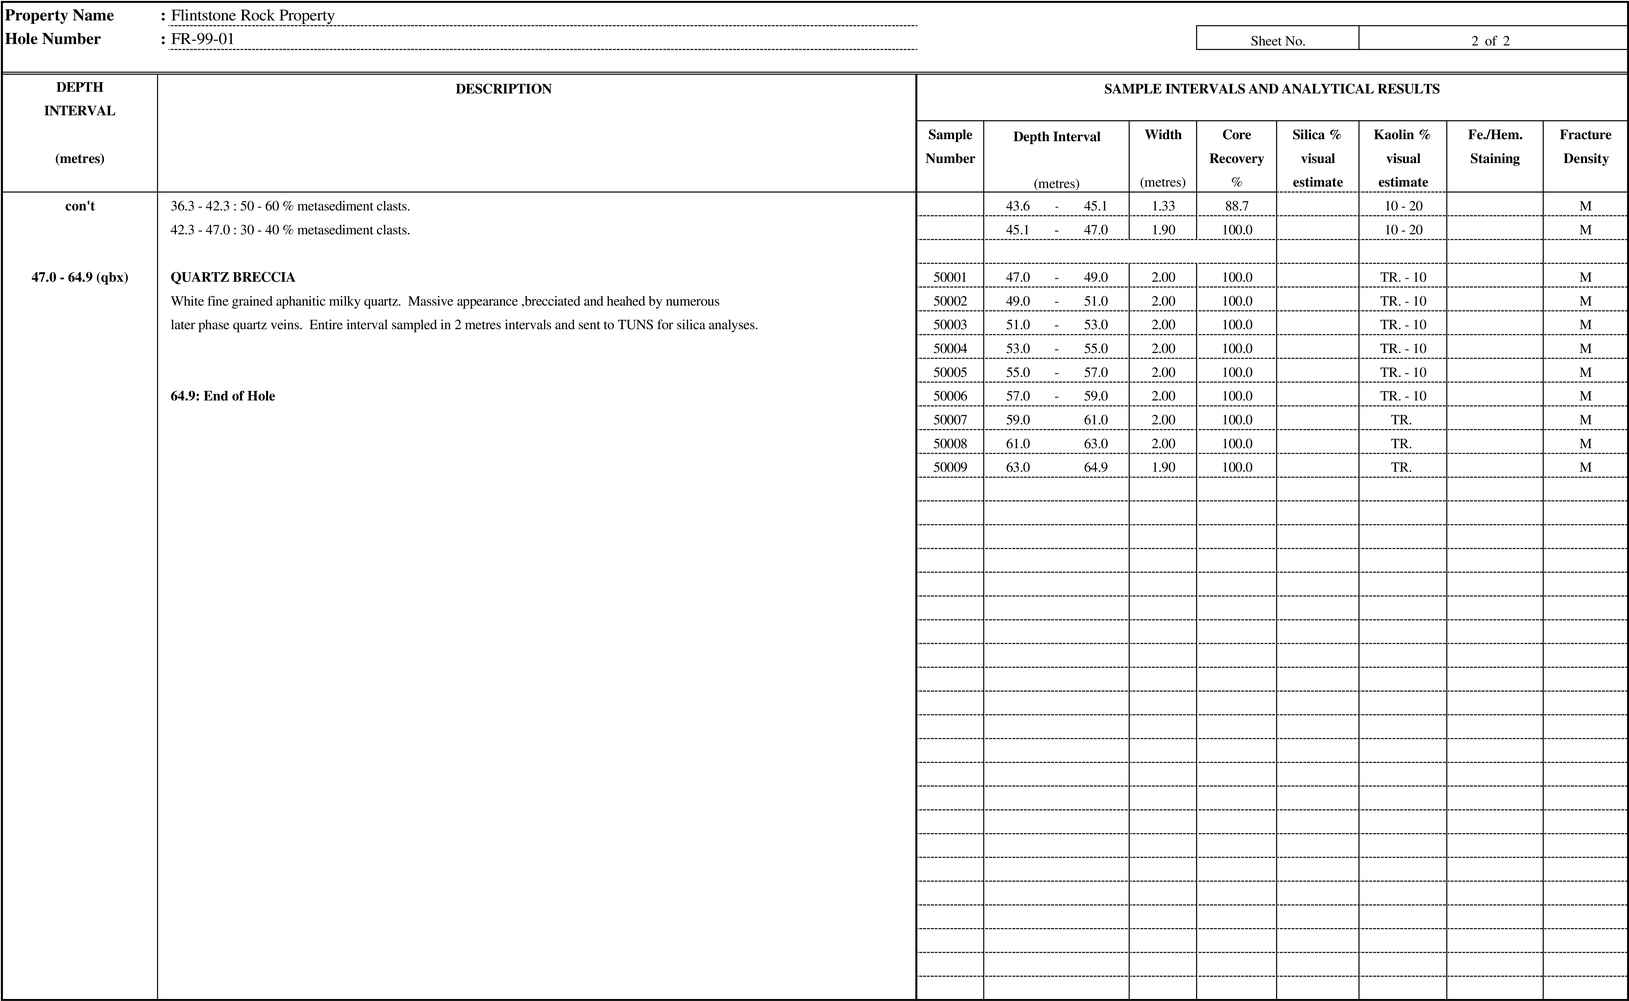

Property Name : Flintstone Rock Property Hole Number : FR-99-01 Sheet No. 2  of  2 DEPTH DESCRIPTION SAMPLE INTERVALS AND ANALYTICAL RESULTS INTERVAL Sample Width Core Silica % Kaolin % Fe./Hem. Fracture Depth Interval (metres) Number Recovery visual visual Staining Density (metres) % estimate estimate (metres) - con't 36.3 - 42.3 : 50 - 60 % metasediment clasts. 43.6 45.1 1.33 88.7 10 - 20 M 42.3 - 47.0 : 30 - 40 % metasediment clasts. 45.1 - 47.0 1.90 100.0 10 - 20 M 47.0 - 64.9 (qbx) QUARTZ BRECCIA 50001 47.0 - 49.0 2.00 100.0 TR. - 10 M White fine grained aphanitic milky quartz.  Massive appearance ,brecciated and heahed by numerous 50002 49.0 - 51.0 2.00 100.0 TR. - 10 M later phase quartz veins.  Entire interval sampled in 2 metres intervals and sent to TUNS for silica analyses. 50003 51.0 - 53.0 2.00 100.0 TR. - 10 M 50004 53.0 - 55.0 2.00 100.0 TR. - 10 M 50005 55.0 - 57.0 2.00 100.0 TR. - 10 M 64.9: End of Hole 50006 57.0 - 59.0 2.00 100.0 TR. - 10 M 50007 59.0 61.0 2.00 100.0

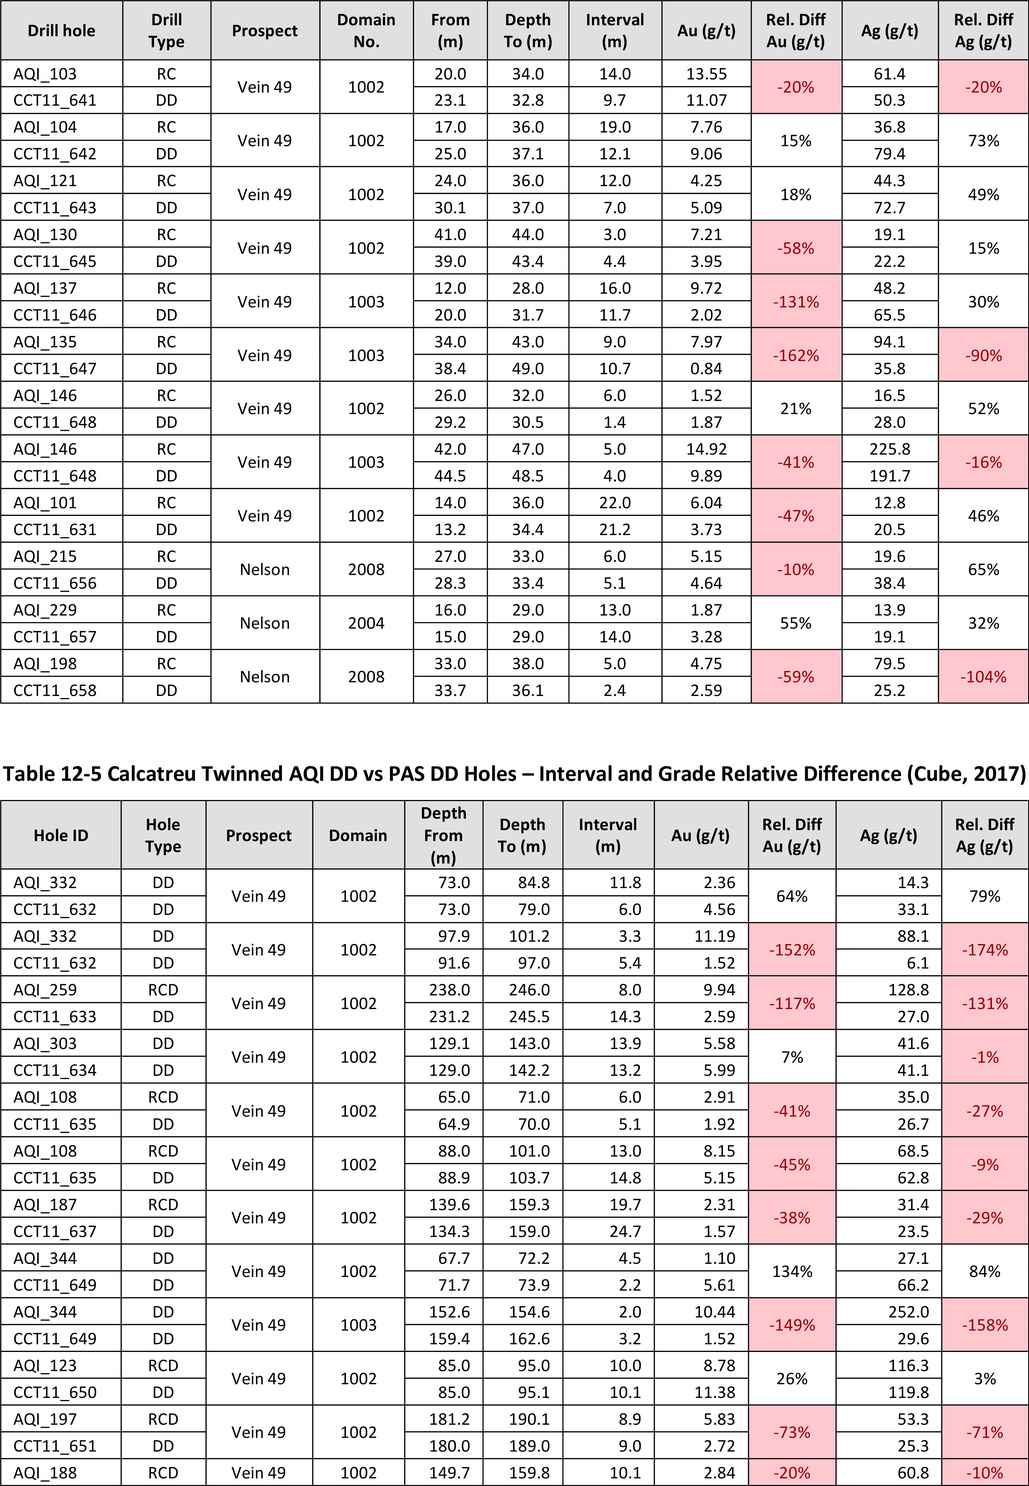

Drill Domain From Depth Interval Rel. Diff Rel. Diff Drill hole Prospect Au (g/t) Ag (g/t) Type No. (m) To (m) (m) Au (g/t) Ag (g/t) AQI_103 RC 20.0 34.0 14.0 13.55 61.4 Vein 49 1002 -20% -20% CCT11_641 DD 23.1 32.8 9.7 11.07 50.3 AQI_104 RC 17.0 36.0 19.0 7.76 36.8 Vein 49 1002 15% 73% CCT11_642 DD 25.0 37.1 12.1 9.06 79.4 AQI_121 RC 24.0 36.0 12.0 4.25 44.3 Vein 49 1002 18% 49% CCT11_643 DD 30.1 37.0 7.0 5.09 72.7 AQI_130 RC 41.0 44.0 3.0 7.21 19.1 Vein 49 1002 -58% 15% CCT11_645 DD 39.0 43.4 4.4 3.95 22.2 AQI_137 RC 12.0 28.0 16.0 9.72 48.2 Vein 49 1003 -131% 30% CCT11_646 DD 20.0 31.7 11.7 2.02 65.5 AQI_135 RC 34.0 43.0 9.0 7.97 94.1 Vein 49 1003 -162% -90% CCT11_647 DD 38.4 49.0 10.7 0.84 35.8 AQI_146 RC 26.0 32.0 6.0 1.52 16.5 Vein 49 1002 21% 52% CCT11_648 DD 29.2 30.5 1.4 1.87 28.0 AQI_146 RC 42.0 47.0 5.0 14.92 225.8 Vein 49 1003 -41% -16% CCT11_648 DD 44.5 48.5 4.0 9.89 191.7 AQI_101 RC 14.0 36.0 22.0 6.04 12.8 Vein 49 1002 -47% 46% CCT11_631 DD 13.2 34.4 21.2 3.73 20.5 AQI_2

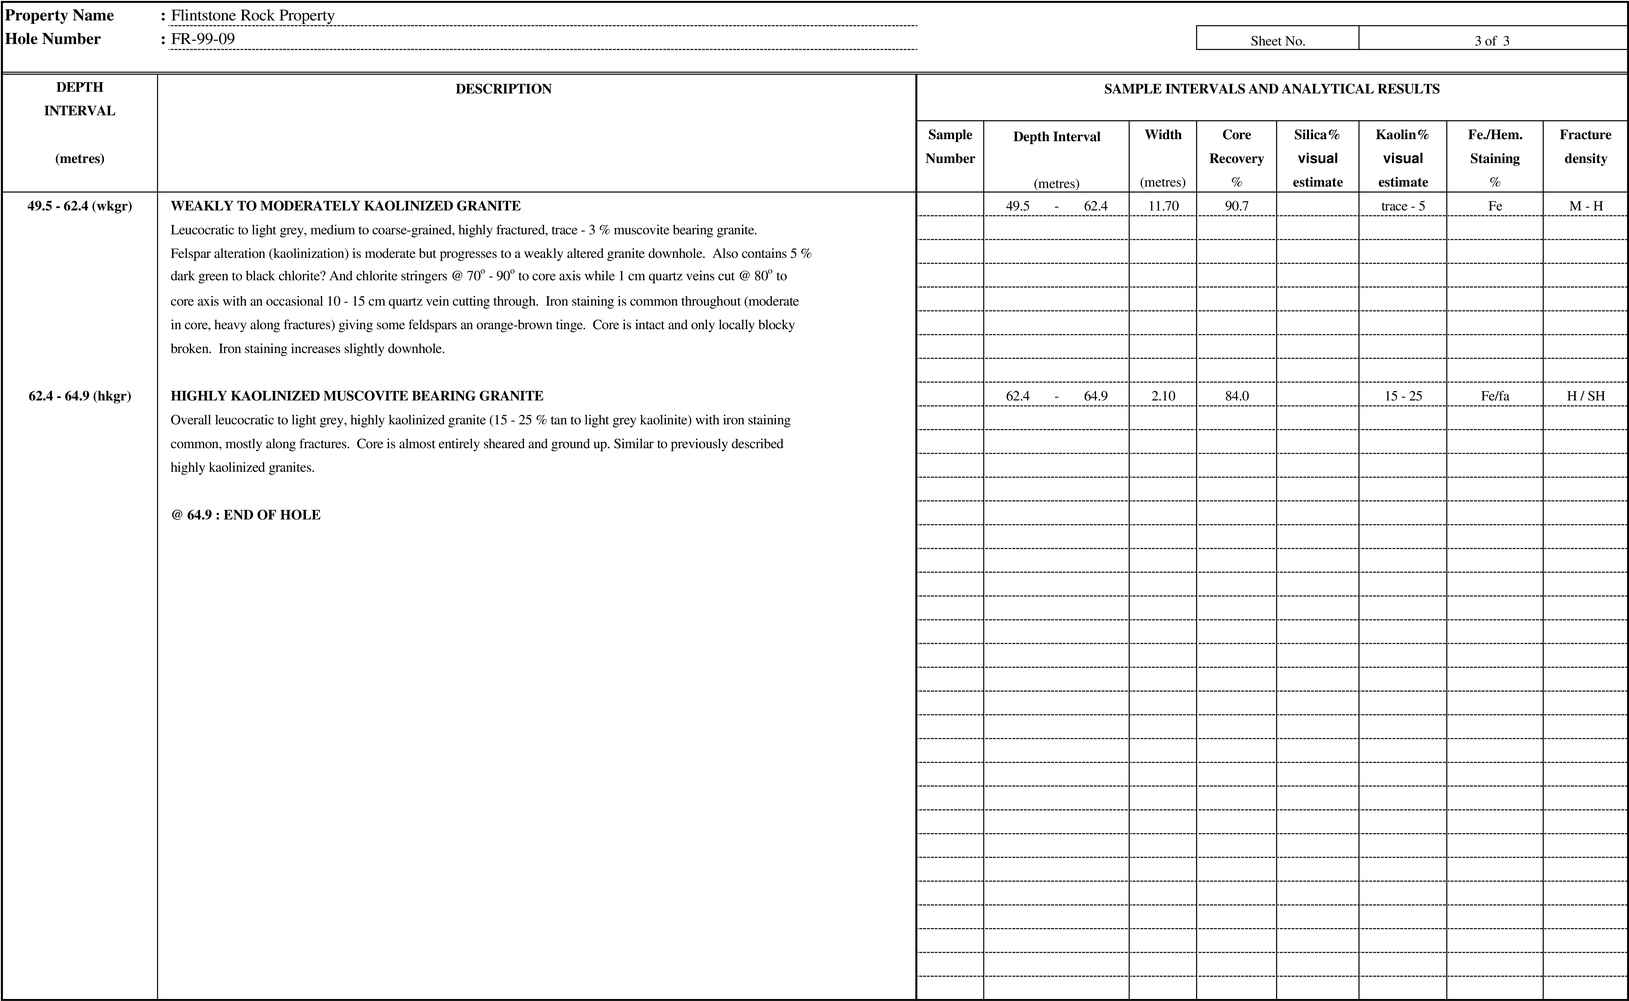

Property Name : Flintstone Rock Property Hole Number : FR-99-09 Sheet No. 3 of  3 DEPTH DESCRIPTION SAMPLE INTERVALS AND ANALYTICAL RESULTS INTERVAL Sample Width Core Silica% Kaolin% Fe./Hem. Fracture Depth Interval visual visual (metres) Number Recovery Staining density (metres) % estimate estimate % (metres) 49.5 - 62.4 (wkgr) WEAKLY TO MODERATELY KAOLINIZED GRANITE 49.5 - 62.4 11.70 90.7 trace - 5 Fe M - H Leucocratic to light grey, medium to coarse-grained, highly fractured, trace - 3 % muscovite bearing granite. Felspar alteration (kaolinization) is moderate but progresses to a weakly altered granite downhole.  Also contains 5 % dark green to black chlorite? And chlorite stringers @ 70o - 90o to core axis while 1 cm quartz veins cut @ 80o to core axis with an occasional 10 - 15 cm quartz vein cutting through.  Iron staining is common throughout (moderate in core, heavy along fractures) giving some feldspars an orange-brown tinge.  Core is intact and only locally blocky broken.  Ir

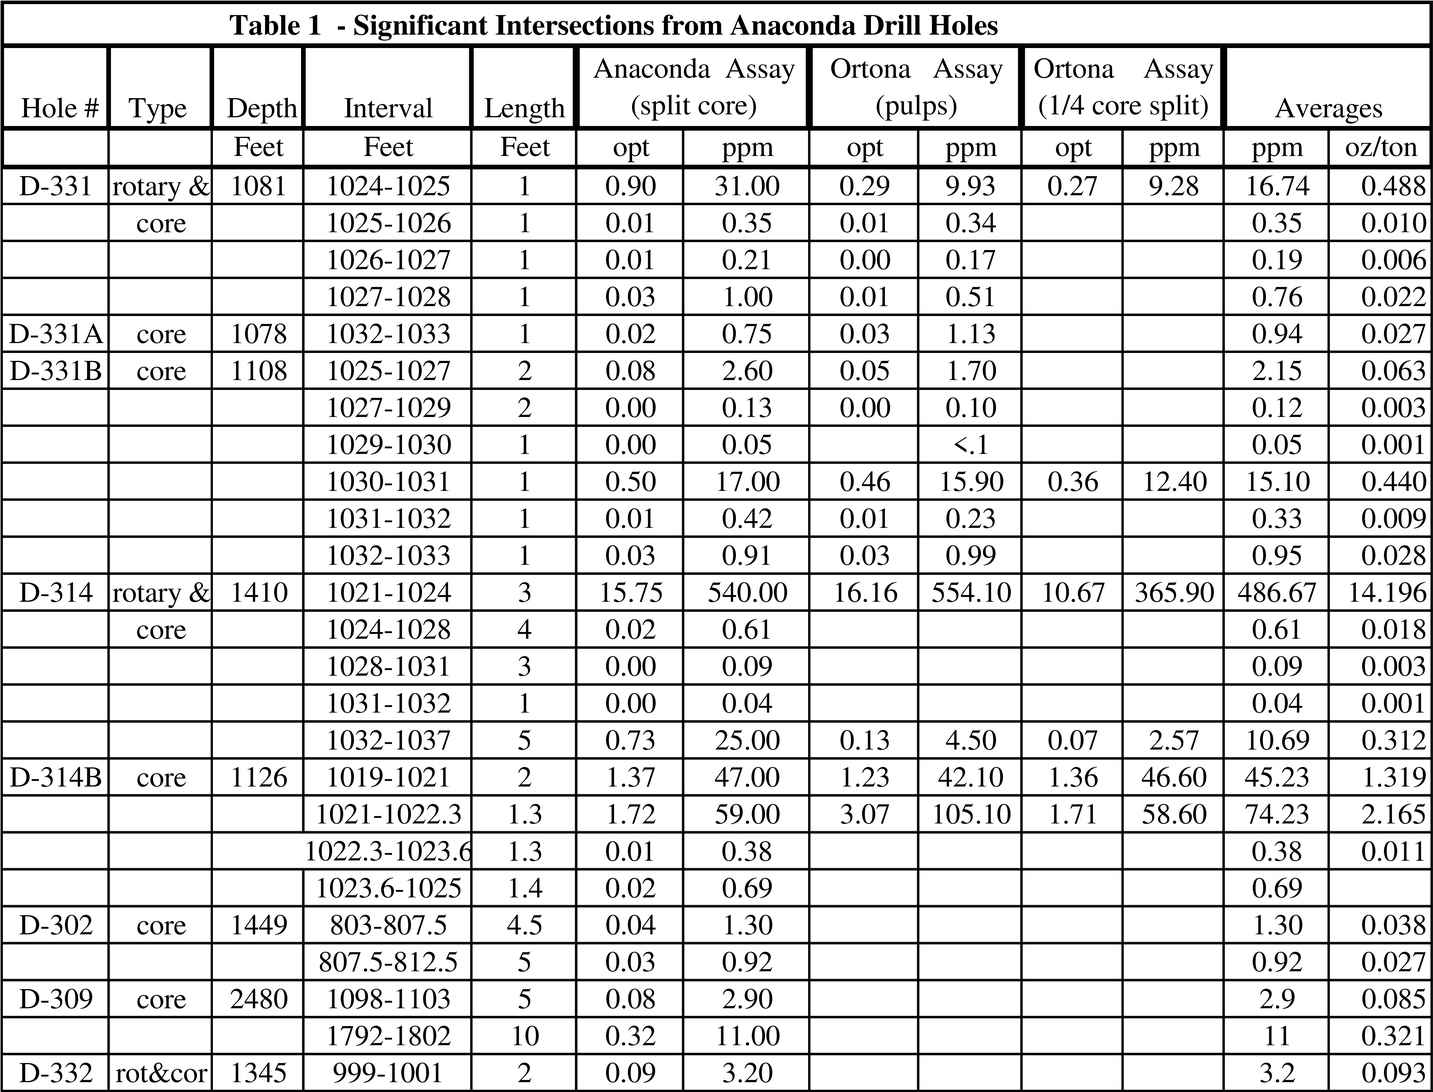

Table 1  - Significant Intersections from Anaconda Drill Holes Anaconda  Assay Ortona   Assay Ortona    Assay (split core) (pulps) (1/4 core split) Hole # Type Depth Interval Length Feet Feet Feet opt ppm opt ppm opt D-331 rotary & 1081 1024-1025 1 0.90 31.00 0.29 9.93 0.27 core 1025-1026 1 0.01 0.35 0.01 0.34 1026-1027 1 0.01 0.21 0.00 0.17 1027-1028 1 0.03 1.00 0.01 0.51 D-331A core 1078 1032-1033 1 0.02 0.75 0.03 1.13 D-331B core 1108 1025-1027 2 0.08 2.60 0.05 1.70 1027-1029 2 0.00 0.13 0.00 0.10 1029-1030 1 0.00 0.05 <.1 1030-1031 1 0.50 17.00 0.46 15.90 0.36 1031-1032 1 0.01 0.42 0.01 0.23 1032-1033 1 0.03 0.91 0.03 0.99 D-314 rotary & 1410 1021-1024 3 15.75 540.00 16.16 554.10 10.67 365.90 486.67 core 1024-1028 4 0.02 0.61 1028-1031 3 0.00 0.09 1031-1032 1 0.00 0.04 1032-1037 5 0.73 25.00 0.13 4.50 0.07 D-314B core 1126 1019-1021 2 1.37 47.00 1.23 42.10 1.36 1021-1022.3 1.3 1.72 59.00 3.07 105.10 1.71 1022.3-1023.6 1.3 0.01 0.38 1023.6-1025 1.4 0.02 0.69 D-302 core 1449 803-807.

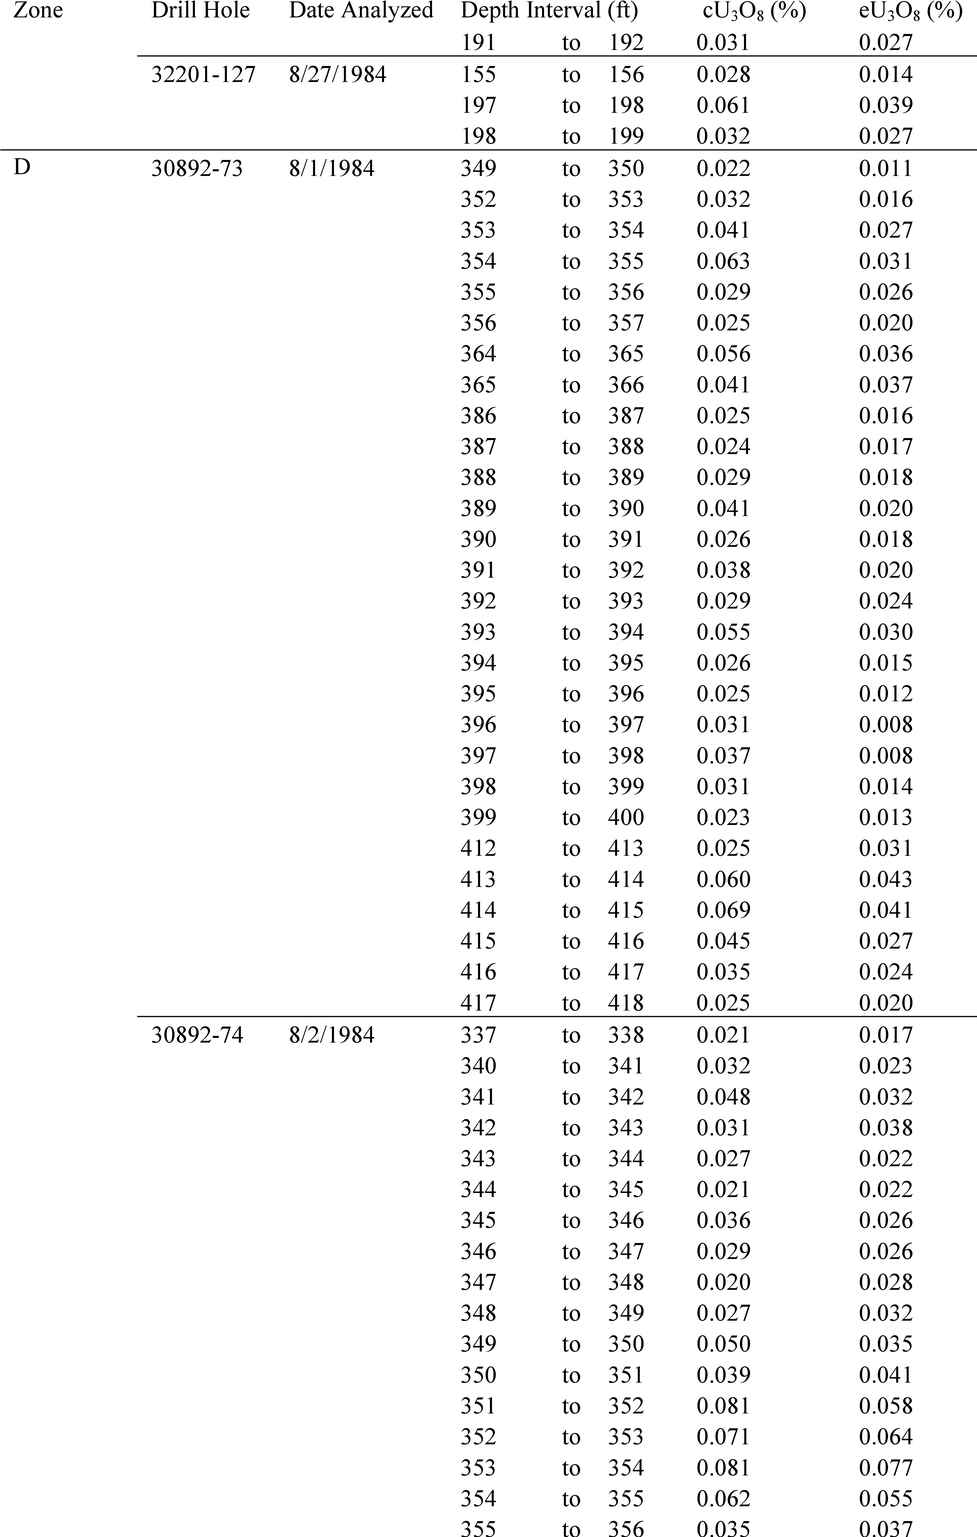

Zone Drill Hole  Date Analyzed  Depth Interval (ft) cU3O8 (%) eU3O8 (%)    191 to  192 0.031 0.027  32201-127 8/27/1984 155 to  156 0.028 0.014    197 to  198 0.061 0.039    198 to  199 0.032 0.027 D 30892-73 8/1/1984 349 to  350 0.022 0.011    352 to  353 0.032 0.016    353 to  354 0.041 0.027    354 to  355 0.063 0.031    355 to  356 0.029 0.026    356 to  357 0.025 0.020    364 to  365 0.056 0.036    365 to  366 0.041 0.037    386 to  387 0.025 0.016    387 to  388 0.024 0.017    388 to  389 0.029 0.018    389 to  390 0.041 0.020    390 to  391 0.026 0.018    391 to  392 0.038 0.020    392 to  393 0.029 0.024    393 to  394 0.055 0.030    394 to  395 0.026 0.015    395 to  396 0.025 0.012    396 to  397 0.031 0.008    397 to  398 0.037 0.008    398 to  399 0.031 0.014    399 to  400 0.023 0.013    412 to  413 0.025 0.031    413 to  414 0.060 0.043    414 to  415 0.069 0.041    415 to  416 0.045 0.027    416 to  417 0.035 0.024    417 to  418 0.025 0.020  30892-74 8/2/1984 337 to  33

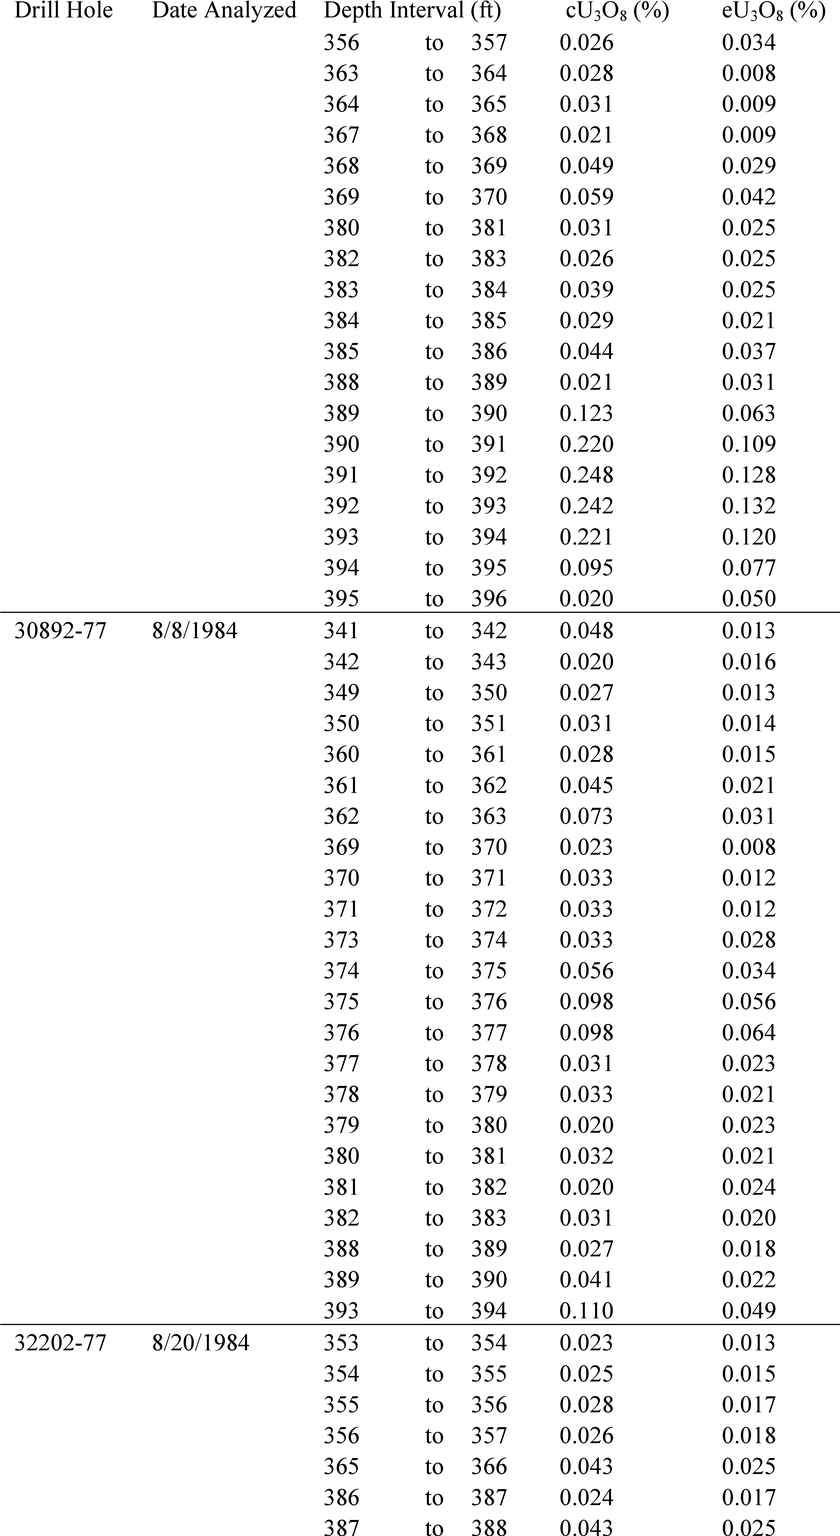

Drill Hole  Date Analyzed  Depth Interval (ft) cU3O8 (%) eU3O8 (%)   356 to  357 0.026 0.034   363 to  364 0.028 0.008   364 to  365 0.031 0.009   367 to  368 0.021 0.009   368 to  369 0.049 0.029   369 to  370 0.059 0.042   380 to  381 0.031 0.025   382 to  383 0.026 0.025   383 to  384 0.039 0.025   384 to  385 0.029 0.021   385 to  386 0.044 0.037   388 to  389 0.021 0.031   389 to  390 0.123 0.063   390 to  391 0.220 0.109   391 to  392 0.248 0.128   392 to  393 0.242 0.132   393 to  394 0.221 0.120   394 to  395 0.095 0.077   395 to  396 0.020 0.050 30892-77 8/8/1984 341 to  342 0.048 0.013   342 to  343 0.020 0.016   349 to  350 0.027 0.013   350 to  351 0.031 0.014   360 to  361 0.028 0.015   361 to  362 0.045 0.021   362 to  363 0.073 0.031   369 to  370 0.023 0.008   370 to  371 0.033 0.012   371 to  372 0.033 0.012   373 to  374 0.033 0.028   374 to  375 0.056 0.034   375 to  376 0.098 0.056   376 to  377 0.098 0.064   377 to  378 0.031 0.023   378 to  379 0.033 0.021   379 t

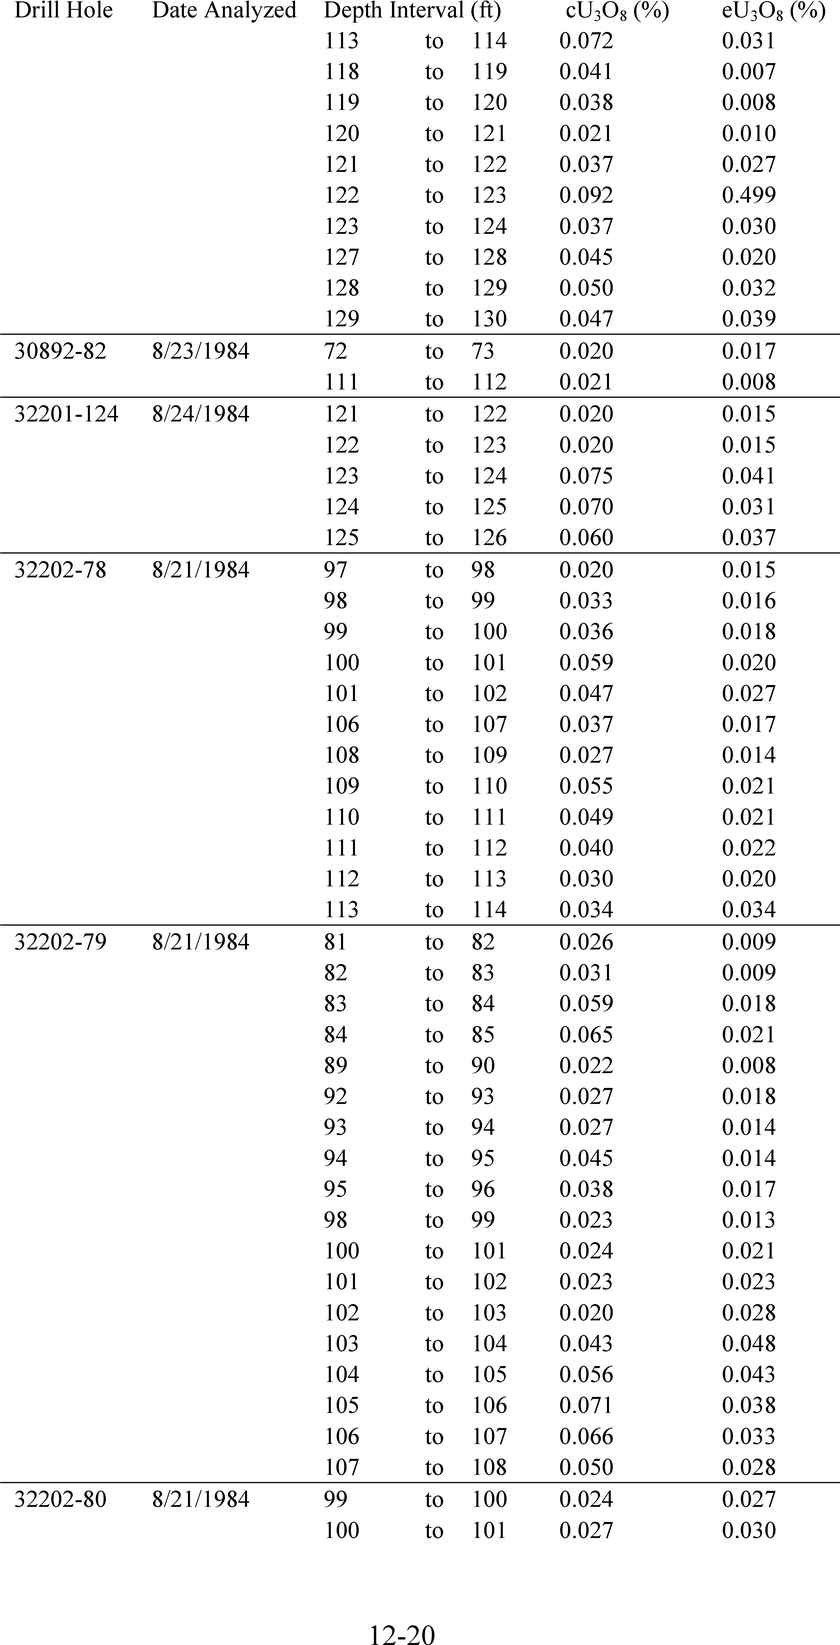

Drill Hole  Date Analyzed  Depth Interval (ft) cU3O8 (%) eU3O8 (%)   113 to  114 0.072 0.031   118 to  119 0.041 0.007   119 to  120 0.038 0.008   120 to  121 0.021 0.010   121 to  122 0.037 0.027   122 to  123 0.092 0.499   123 to  124 0.037 0.030   127 to  128 0.045 0.020   128 to  129 0.050 0.032   129 to  130 0.047 0.039 30892-82 8/23/1984 72 to  73 0.020 0.017   111 to  112 0.021 0.008 32201-124 8/24/1984 121 to  122 0.020 0.015   122 to  123 0.020 0.015   123 to  124 0.075 0.041   124 to  125 0.070 0.031   125 to  126 0.060 0.037 32202-78 8/21/1984 97 to  98 0.020 0.015   98 to  99 0.033 0.016   99 to  100 0.036 0.018   100 to  101 0.059 0.020   101 to  102 0.047 0.027   106 to  107 0.037 0.017   108 to  109 0.027 0.014   109 to  110 0.055 0.021   110 to  111 0.049 0.021   111 to  112 0.040 0.022   112 to  113 0.030 0.020   113 to  114 0.034 0.034 32202-79 8/21/1984 81 to  82 0.026 0.009   82 to  83 0.031 0.009   83 to  84 0.059 0.018   84 to  85 0.065 0.021   89 to  90 0.022 0.0

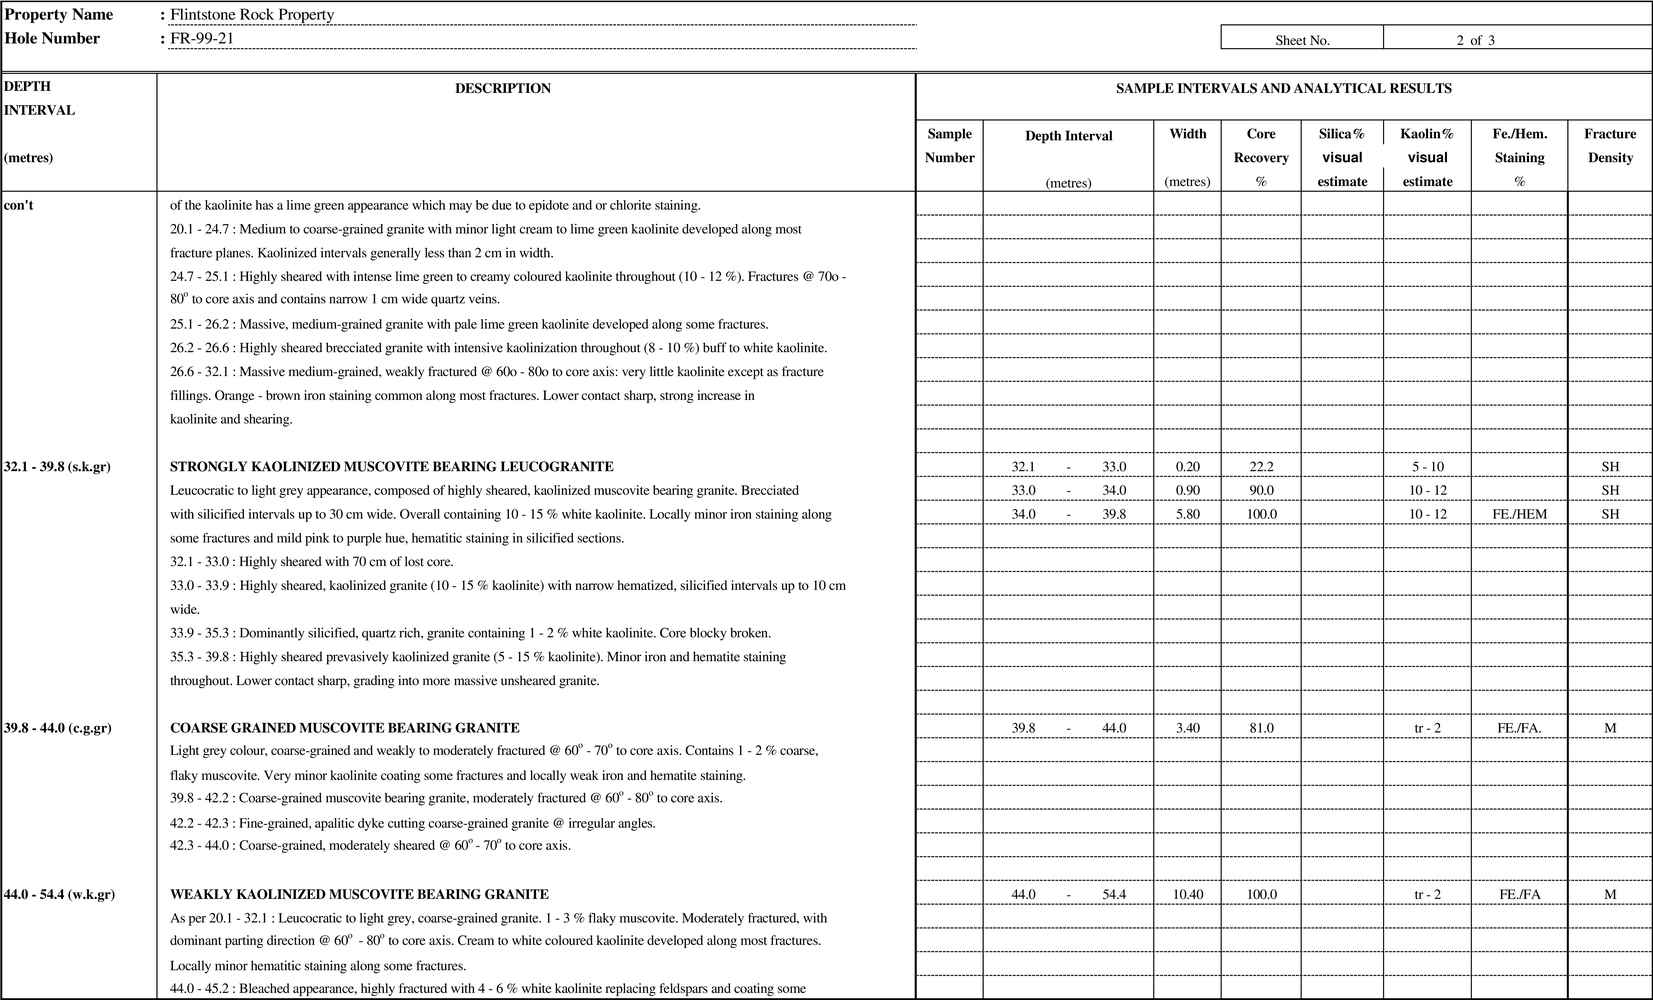

Property Name : Flintstone Rock Property Hole Number : FR-99-21 Sheet No. 2  of  3 DESCRIPTION SAMPLE INTERVALS AND ANALYTICAL RESULTS INTERVAL Sample Width Core Silica% Kaolin% Fe./Hem. Fracture Depth Interval visual visual Number Recovery Staining Density (metres) % estimate estimate % (metres) of the kaolinite has a lime green appearance which may be due to epidote and or chlorite staining. 20.1 - 24.7 : Medium to coarse-grained granite with minor light cream to lime green kaolinite developed along most fracture planes. Kaolinized intervals generally less than 2 cm in width. 24.7 - 25.1 : Highly sheared with intense lime green to creamy coloured kaolinite throughout (10 - 12 %). Fractures @ 70o - 80o to core axis and contains narrow 1 cm wide quartz veins. 25.1 - 26.2 : Massive, medium-grained granite with pale lime green kaolinite developed along some fractures. 26.2 - 26.6 : Highly sheared brecciated granite with intensive kaolinization throughout (8 - 10 %) buff to white kaolinit

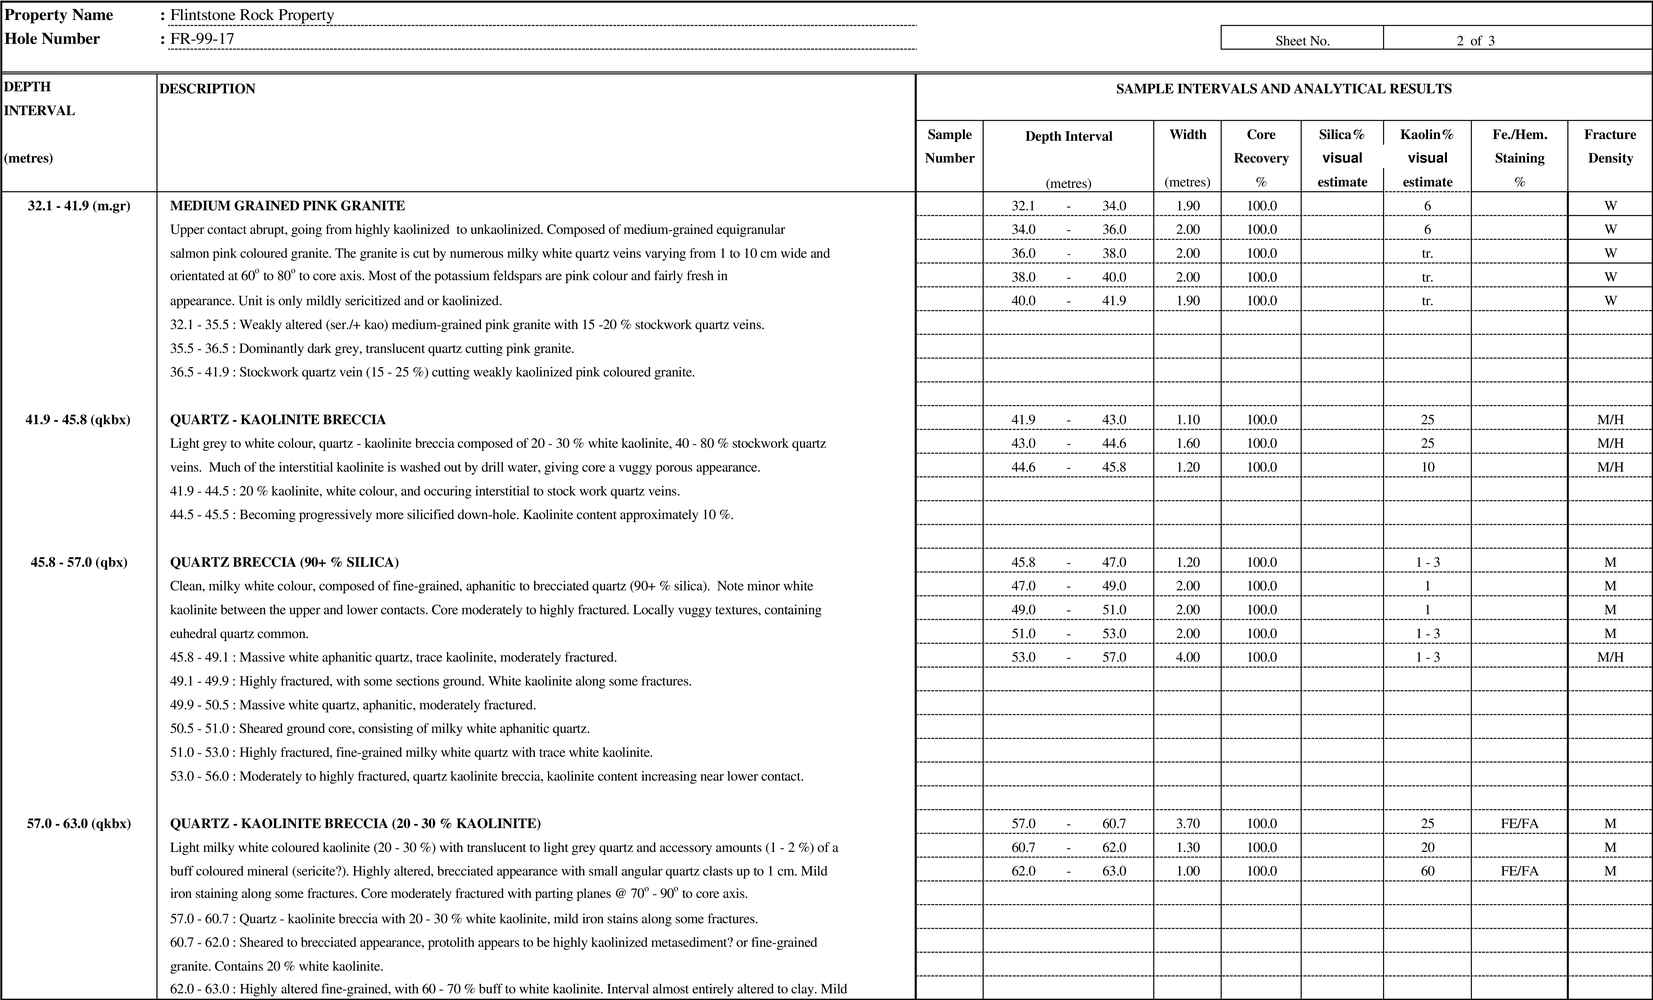

Property Name : Flintstone Rock Property Hole Number : FR-99-17 Sheet No. 2  of  3 DESCRIPTION SAMPLE INTERVALS AND ANALYTICAL RESULTS INTERVAL Sample Width Core Silica% Kaolin% Fe./Hem. Fracture Depth Interval visual visual Number Recovery Staining Density (metres) % estimate estimate % (metres) 32.1 - 41.9 (m.gr) MEDIUM GRAINED PINK GRANITE 32.1 - 34.0 1.90 100.0 6 W Upper contact abrupt, going from highly kaolinized  to unkaolinized. Composed of medium-grained equigranular 34.0 - 36.0 2.00 100.0 6 W - salmon pink coloured granite. The granite is cut by numerous milky white quartz veins varying from 1 to 10 cm wide and 36.0 38.0 2.00 100.0 tr. W orientated at 60o to 80o to core axis. Most of the potassium feldspars are pink colour and fairly fresh in 38.0 - 40.0 2.00 100.0 tr. W appearance. Unit is only mildly sericitized and or kaolinized. 40.0 - 41.9 1.90 100.0 tr. W 32.1 - 35.5 : Weakly altered (ser./+ kao) medium-grained pink granite with 15 -20 % stockwork quartz veins. 35.5 - 3

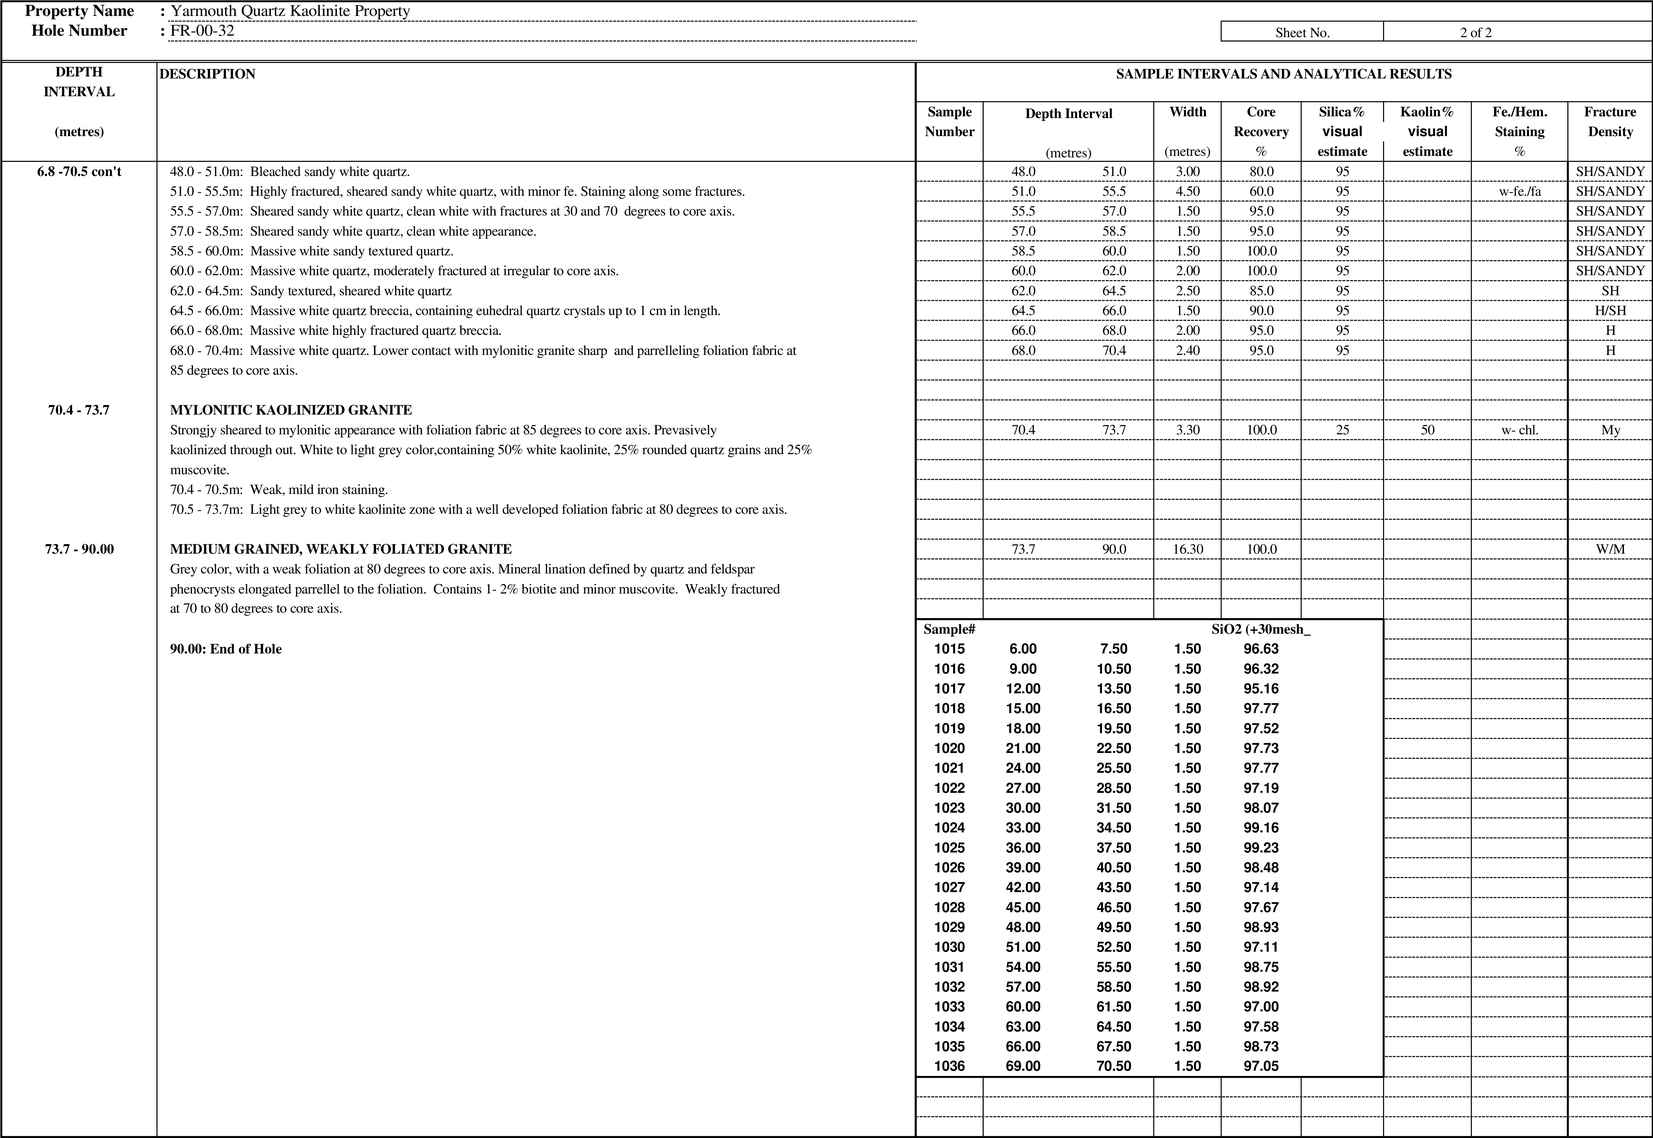

Property Name : Yarmouth Quartz Kaolinite Property Hole Number : FR-00-32 Sheet No. 2 of 2 DEPTH DESCRIPTION SAMPLE INTERVALS AND ANALYTICAL RESULTS INTERVAL Sample Width Core Silica% Kaolin% Fe./Hem. Fracture Depth Interval visual visual (metres) Number Recovery Staining Density (metres) % estimate estimate % (metres) 6.8 -70.5 con't 48.0 - 51.0m:  Bleached sandy white quartz. 48.0 51.0 3.00 80.0 95 SH/SANDY 51.0 - 55.5m:  Highly fractured, sheared sandy white quartz, with minor fe. Staining along some fractures. 51.0 55.5 4.50 60.0 95 w-fe./fa SH/SANDY 55.5 - 57.0m:  Sheared sandy white quartz, clean white with fractures at 30 and 70  degrees to core axis. 55.5 57.0 1.50 95.0 95 SH/SANDY 57.0 - 58.5m:  Sheared sandy white quartz, clean white appearance. 57.0 58.5 1.50 95.0 95 SH/SANDY 58.5 - 60.0m:  Massive white sandy textured quartz. 58.5 60.0 1.50 100.0 95 SH/SANDY 60.0 - 62.0m:  Massive white quartz, moderately fractured at irregular to core axis. 60.0 62.0 2.00 100.0 95 SH/SANDY

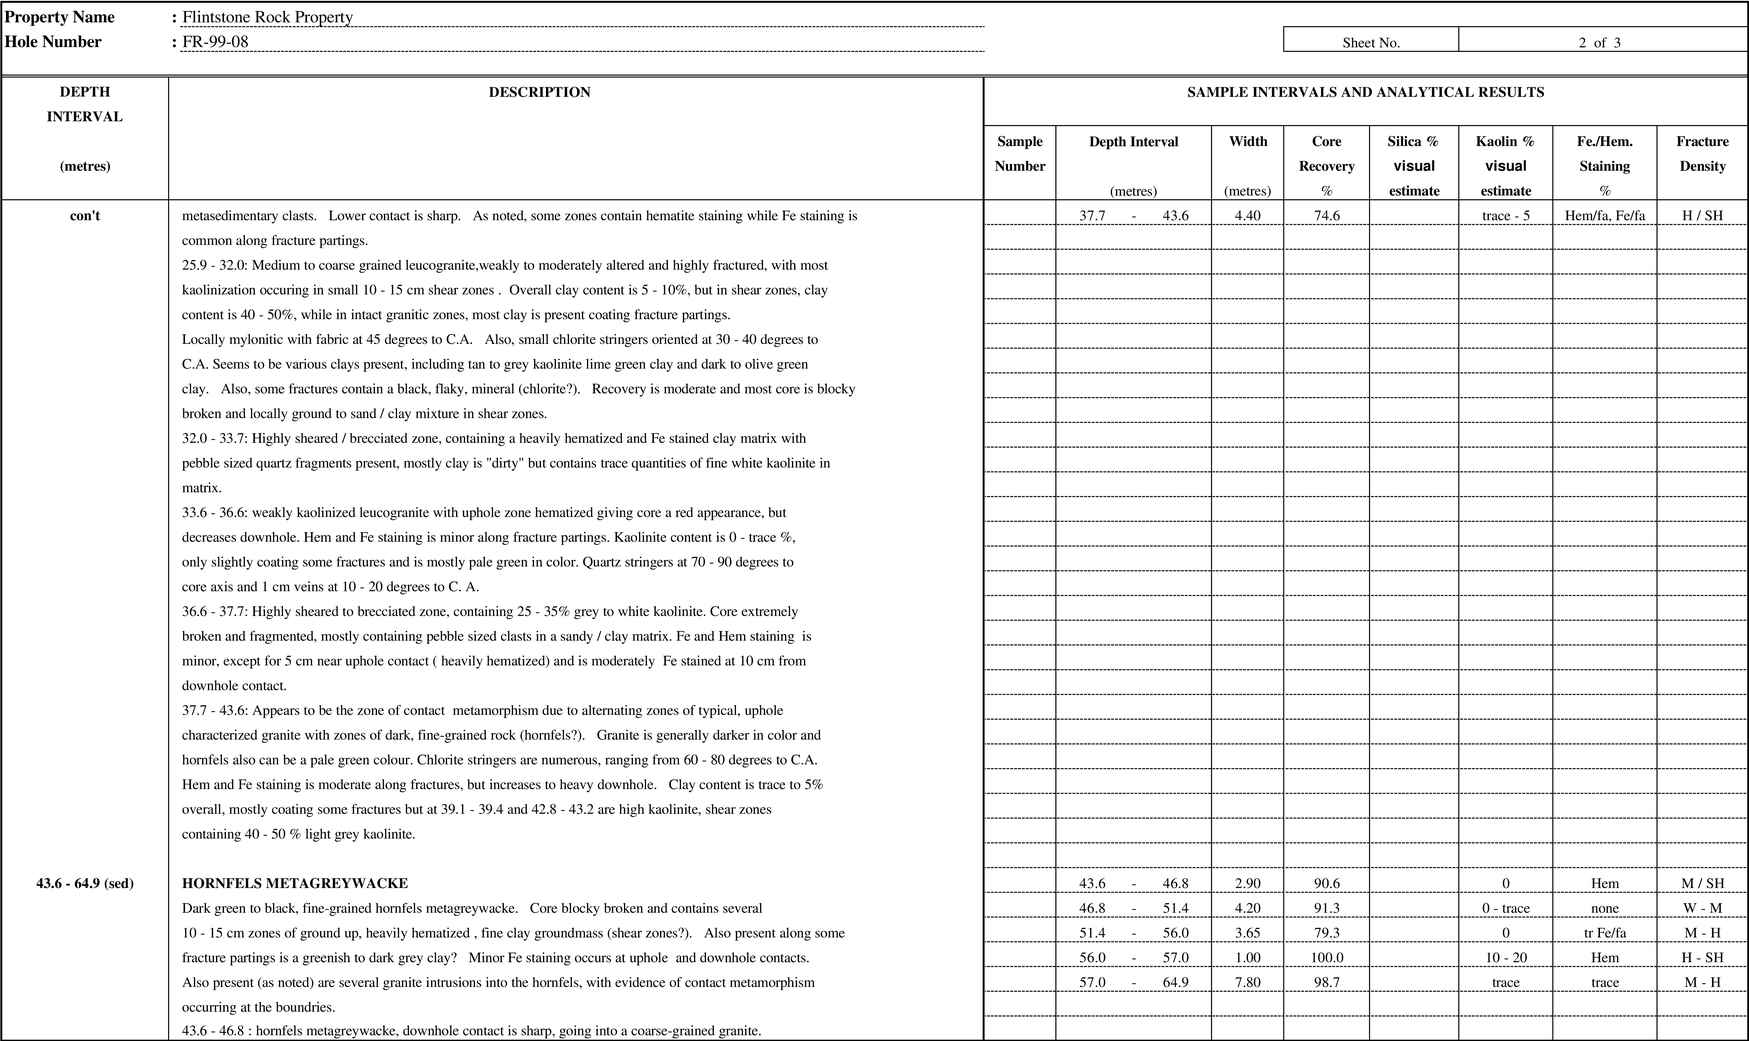

Property Name : Flintstone Rock Property Sheet No. 2  of  3 Hole Number : FR-99-08 DEPTH DESCRIPTION SAMPLE INTERVALS AND ANALYTICAL RESULTS INTERVAL Sample Width Core Silica % Kaolin % Fe./Hem. Fracture Depth Interval visual visual (metres) Number Recovery Staining Density (metres) % estimate estimate % (metres) con't metasedimentary clasts.   Lower contact is sharp.   As noted, some zones contain hematite staining while Fe staining is 37.7 - 43.6 4.40 74.6 trace - 5 Hem/fa, Fe/fa H / SH common along fracture partings. 25.9 - 32.0: Medium to coarse grained leucogranite,weakly to moderately altered and highly fractured, with most kaolinization occuring in small 10 - 15 cm shear zones .  Overall clay content is 5 - 10%, but in shear zones, clay content is 40 - 50%, while in intact granitic zones, most clay is present coating fracture partings. Locally mylonitic with fabric at 45 degrees to C.A.   Also, small chlorite stringers oriented at 30 - 40 degrees to C.A. Seems to be various clay

TypeError: argument should be a bytes-like object or ASCII string, not 'NoneType'

In [46]:
url=f"https://xdd.wisc.edu/sets/geoarchive/cosmos/api/search?query=depth interval"
resp = requests.get(url)
data = resp.json()
for obj in data["objects"]:
    result = obj['children'][0]
    display(Image(b64decode(result['bytes']),width=600))
    print(result['content'])
    print(result['cls'])


# Text-based API routes
The primary xDD "articles" route can be used to get metadata, text snippets, and pre-indexed vocabularies present within a document. The functionality is outlined in a [swagger UI](https://xdd.wisc.edu/api-docs/), but some functionality highlights:

## Seeing text context of a term
This can be done either through the `/snippets` route or within the `/articles` route with `include_highlights=true`. For example, to see how "hydrodynamic matrix" is _used within the text_ of the Geoarchive documents:




In [48]:
url=f"https://xdd.wisc.edu/api/articles?term=interval depth&include_highlights=true&dataset=Geoarchive&max=10"
resp = requests.get(url)
data = resp.json()
data['success']['data']

[{'type': 'fulltext',
  '_gddid': '620cf21dad0e9c819b050520',
  'title': 'NI 43-101 Technical Report for the Toodoggone Region Project in North America dated 2004',
  'volume': '',
  'journal': '',
  'link': [{'url': 'https://www.zotero.org/groups/4530692/items/5G8SX7SI',
    'type': 'publisher'}],
  'publisher': 'Canadian Securities Administrators',
  'abstract': '',
  'author': [],
  'pages': '',
  'number': '',
  'identifier': [],
  'year': '2004',
  '_highlight': [' Drill Hole Record Epithermal Form Project: Electrum <em class="hl">INTERVAL</em>  <em class="hl">DEPTH</em> COLLAR  From (m) 0.0  To (m',
   ' Epithermal Form Project: <em class="hl">INTERVAL</em>  <em class="hl">DEPTH</em> COLLAR  BEARING 330º  DIP SURVEY TYPE PROPERTY: Elec  -60',
   ': <em class="hl">INTERVAL</em>  <em class="hl">DEPTH</em> COLLAR  BEARING 230º  DIP SURVEY TYPE PROPERTY: Electrum  -45 Brunton  CLAIM:  LENGTH',
   '   Stealth Minerals Ltd. Diamond Drill Hole Record Epithermal Form Project: <em class="

## Getting recognized vocabulary mentions within a document
Supplying a dictionary name to the known_terms parameter (or `known_terms=true` for all!) will provide an overview of how many times terms from certain vocabulary sets are present within xDD. For example, to see all of the lithologies mentioned within a document with xDD id of `620a7aaaad0e9c819bfcd382`:

In [35]:
url=f"https://xdd.wisc.edu/api/articles?docid=620a7aaaad0e9c819bfcd382&term=estimates&known_terms=lithologies&term_format=full"
resp = requests.get(url)
data = resp.json()
data['success']['data'][0]['known_terms']

[{'lithologies': [{'term': 'ignimbrite',
    'n_hits': 1,
    'last_updated': '2022-06-08',
    'classification': ['igneous', 'volcanic']},
   {'term': 'rhyolite',
    'n_hits': 1,
    'last_updated': '2022-06-08',
    'classification': ['igneous', 'volcanic']},
   {'term': 'conglomerate',
    'n_hits': 2,
    'last_updated': '2022-06-08',
    'classification': ['sedimentary', 'siliciclastic']},
   {'term': 'andesite',
    'n_hits': 2,
    'last_updated': '2022-06-08',
    'classification': ['igneous', 'volcanic']},
   {'term': 'volcaniclastic',
    'n_hits': 8,
    'last_updated': '2022-06-08',
    'classification': ['sedimentary', 'siliciclastic']},
   {'term': 'tuff',
    'n_hits': 5,
    'last_updated': '2022-06-08',
    'classification': ['igneous', 'volcanic']},
   {'term': 'chert',
    'n_hits': 1,
    'last_updated': '2022-06-08',
    'classification': ['sedimentary', 'chemical']},
   {'term': 'ash',
    'n_hits': 3,
    'last_updated': '2022-06-08',
    'classification': ['ign